In [38]:
## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_excel('main project ictak.xlsx')
data.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


### Exploratory Data Ananlysis

In [5]:
data.shape

(153104, 55)

In [6]:
data.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153104 entries, 0 to 153103
Data columns (total 55 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unnamed: 0      153104 non-null  int64         
 1   timestamp       153104 non-null  datetime64[ns]
 2   sensor_00       142899 non-null  float64       
 3   sensor_01       153014 non-null  float64       
 4   sensor_02       153088 non-null  float64       
 5   sensor_03       153088 non-null  float64       
 6   sensor_04       153088 non-null  float64       
 7   sensor_05       153088 non-null  float64       
 8   sensor_06       148309 non-null  float64       
 9   sensor_07       147656 non-null  float64       
 10  sensor_08       148000 non-null  float64       
 11  sensor_09       148512 non-null  float64       
 12  sensor_10       153088 non-null  float64       
 13  sensor_11       153088 non-null  float64       
 14  sensor_12       153088 non-null  flo

In [39]:
## Dealing timestamp column by turning into an object column

In [8]:
data['timestamp']=data['timestamp'].astype('datetime64[ns]')
data['timestamp'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 153104 entries, 0 to 153103
Series name: timestamp
Non-Null Count   Dtype         
--------------   -----         
153104 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 1.2 MB


In [9]:
data['date_d']=[d.date() for d in data['timestamp']]
data['time_d']=[d.time() for d in data['timestamp']]

In [10]:
data['date_d'].head()

0    2018-04-01
1    2018-04-01
2    2018-04-01
3    2018-04-01
4    2018-04-01
Name: date_d, dtype: object

In [11]:
data['time_d'].head()

0    00:00:00
1    00:01:00
2    00:02:00
3    00:03:00
4    00:04:00
Name: time_d, dtype: object

In [12]:
data['time_d'].dtypes

dtype('O')

In [13]:
pd.to_datetime(data['time_d'],format='%H:%M:%S')

0        1900-01-01 00:00:00
1        1900-01-01 00:01:00
2        1900-01-01 00:02:00
3        1900-01-01 00:03:00
4        1900-01-01 00:04:00
                 ...        
153099   1900-01-01 07:39:00
153100   1900-01-01 07:40:00
153101   1900-01-01 07:41:00
153102   1900-01-01 07:42:00
153103   1900-01-01 07:43:00
Name: time_d, Length: 153104, dtype: datetime64[ns]

In [14]:
data['time_d'].dtypes

dtype('O')

In [15]:
data.drop(['Unnamed: 0','sensor_15','timestamp'],axis=1,inplace=True)

In [16]:
data.shape

(153104, 54)

In [17]:
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date_d,time_d
0,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:00:00
1,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,...,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL,2018-04-01,00:01:00
2,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,...,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL,2018-04-01,00:02:00
3,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,...,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL,2018-04-01,00:03:00
4,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,...,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL,2018-04-01,00:04:00


### Handling Null Values

In [18]:
data.isnull().sum()  

sensor_00         10205
sensor_01            90
sensor_02            16
sensor_03            16
sensor_04            16
sensor_05            16
sensor_06          4795
sensor_07          5448
sensor_08          5104
sensor_09          4592
sensor_10            16
sensor_11            16
sensor_12            16
sensor_13            16
sensor_14            21
sensor_16            31
sensor_17            46
sensor_18            46
sensor_19            16
sensor_20            16
sensor_21            16
sensor_22            41
sensor_23            16
sensor_24            16
sensor_25            36
sensor_26            20
sensor_27            16
sensor_28            16
sensor_29            72
sensor_30           261
sensor_31            16
sensor_32            68
sensor_33            16
sensor_34            16
sensor_35            16
sensor_36            16
sensor_37            16
sensor_38            24
sensor_39            24
sensor_40            24
sensor_41            24
sensor_42       

<AxesSubplot:xlabel='machine_status', ylabel='count'>

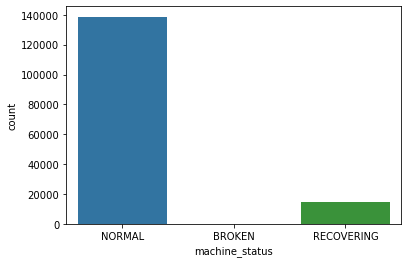

In [19]:
sns.countplot(x=data['machine_status'])

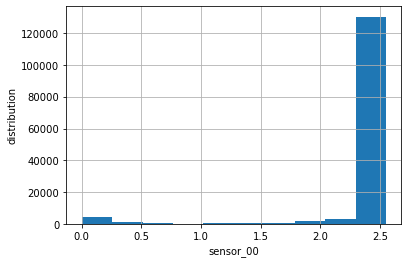

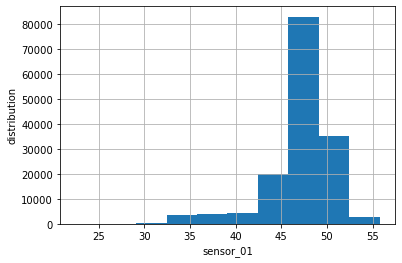

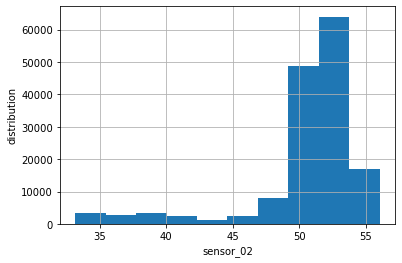

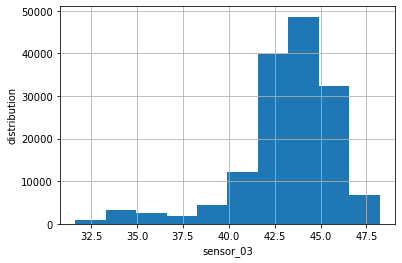

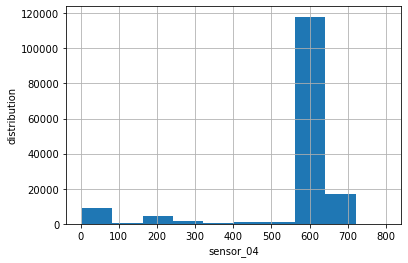

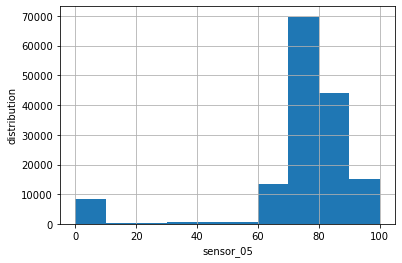

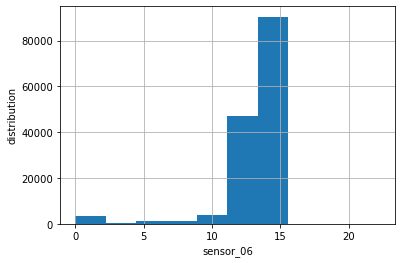

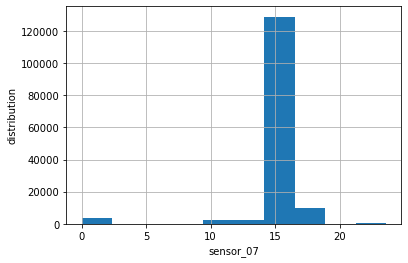

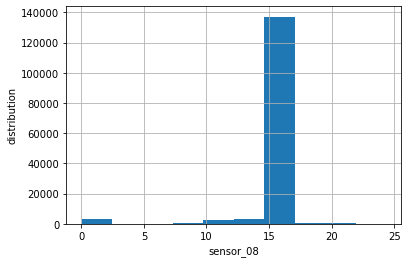

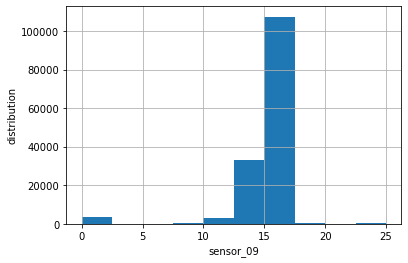

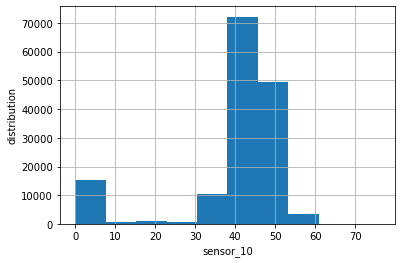

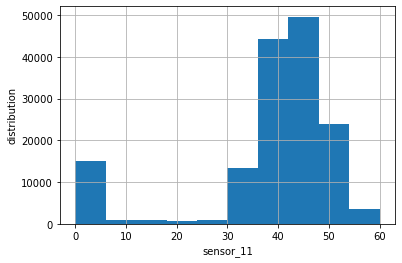

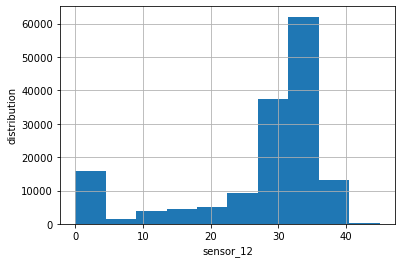

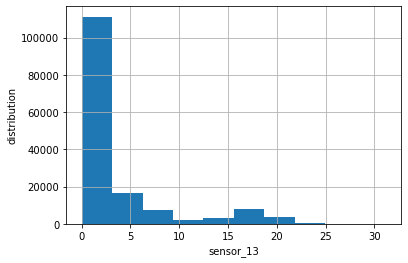

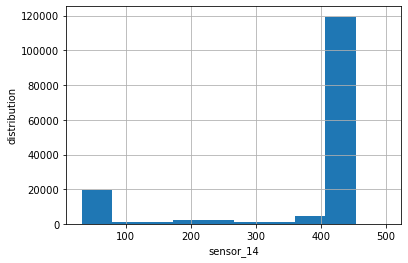

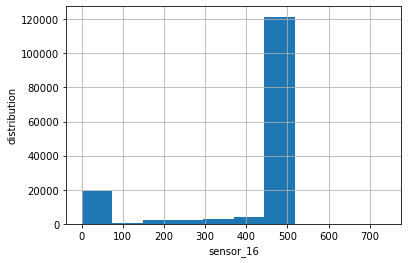

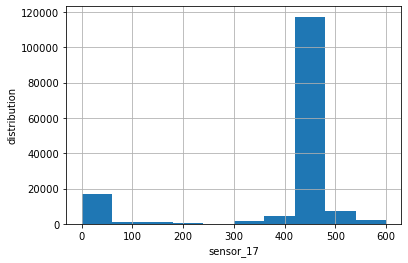

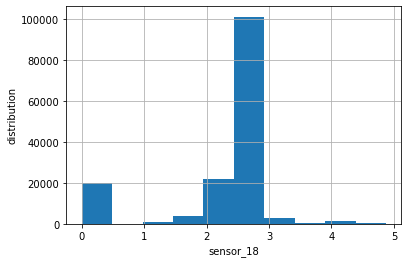

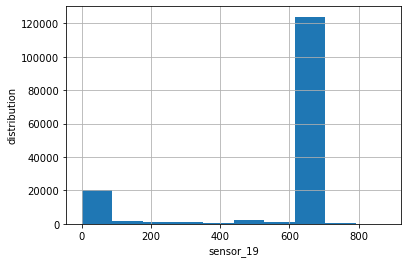

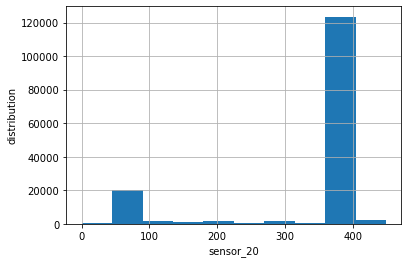

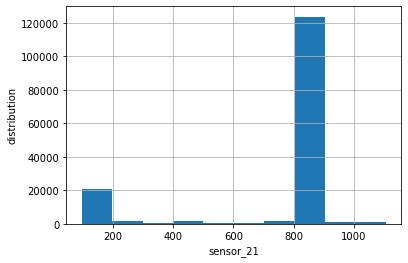

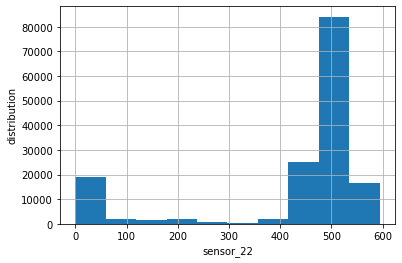

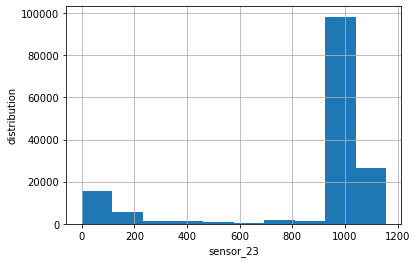

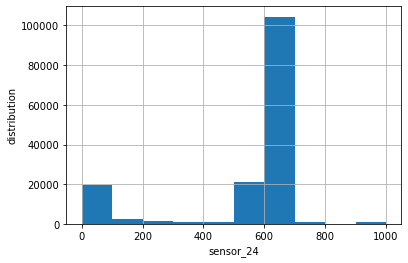

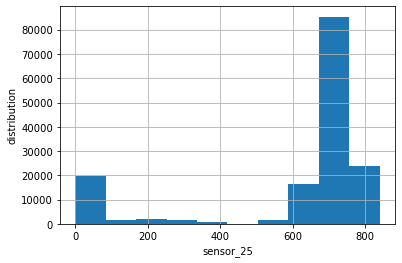

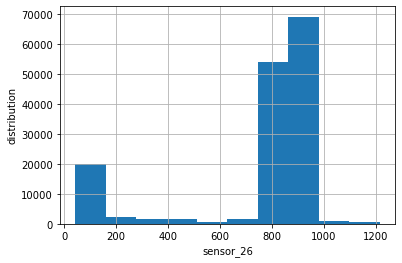

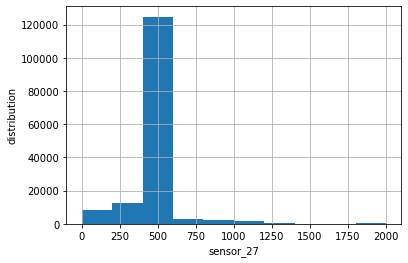

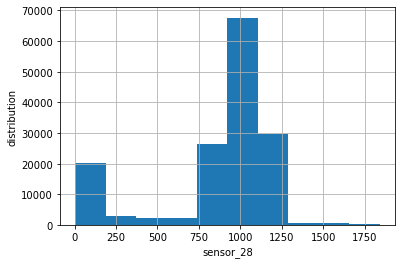

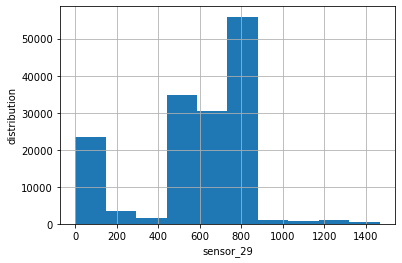

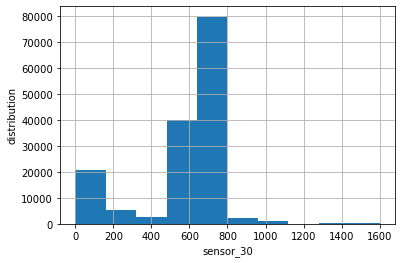

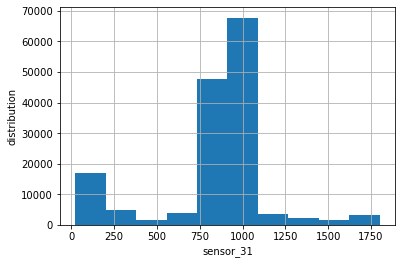

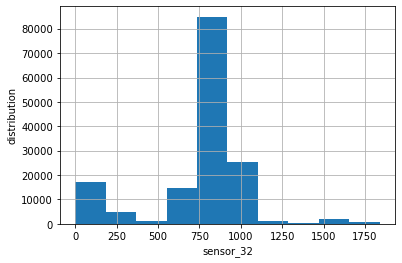

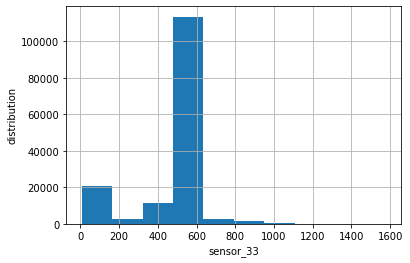

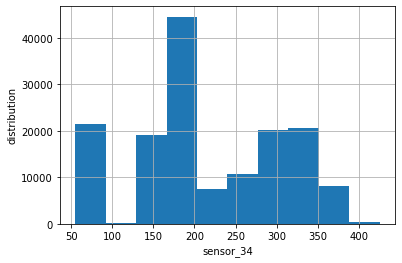

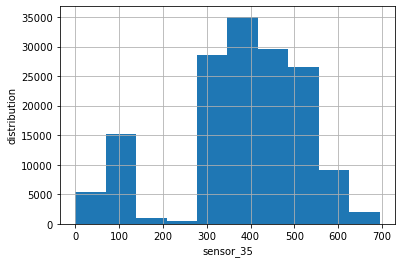

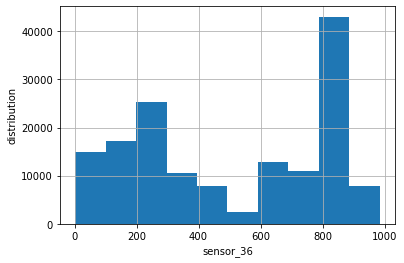

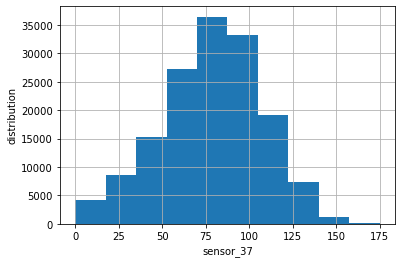

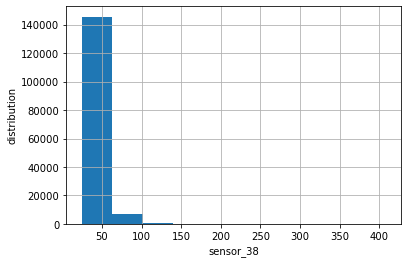

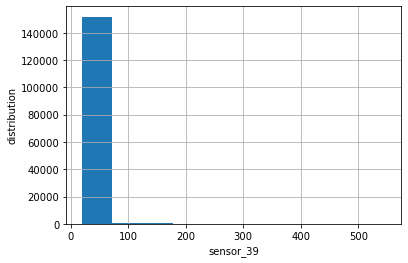

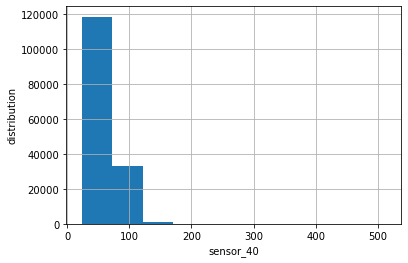

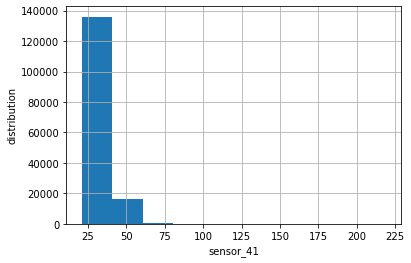

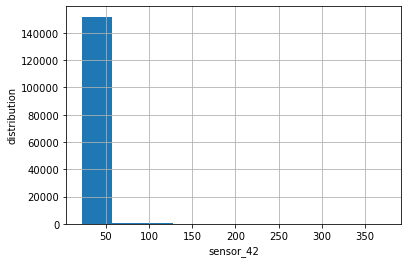

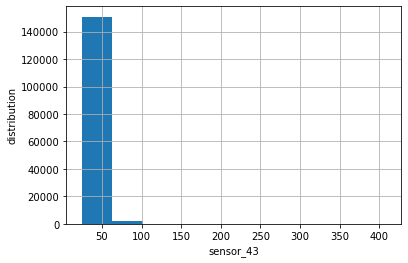

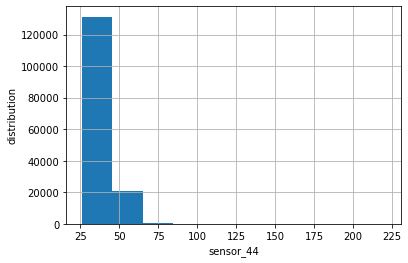

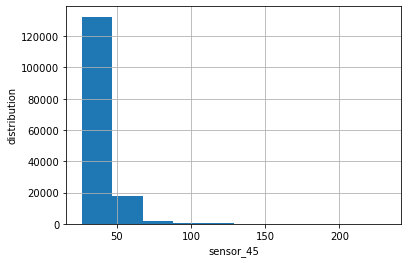

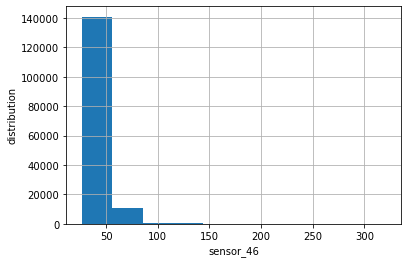

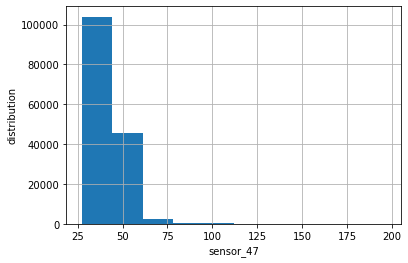

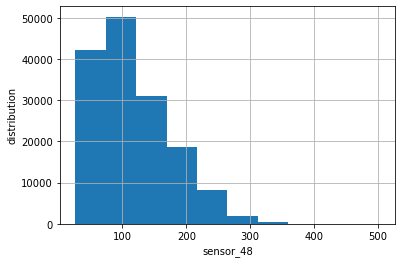

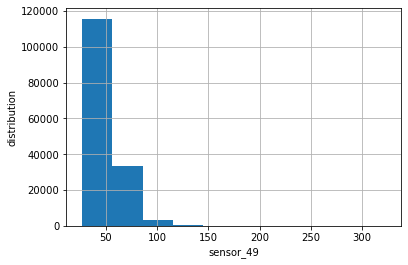

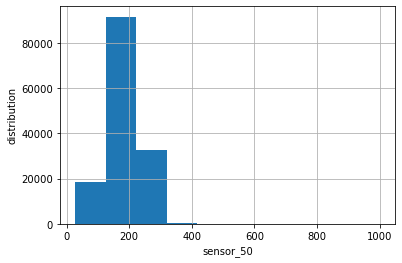

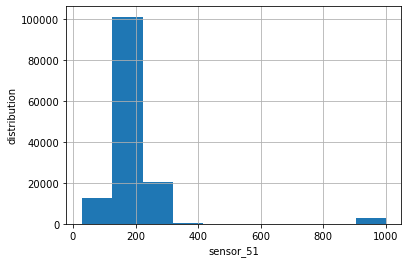

In [20]:
numeric_columns=data.dtypes[data.dtypes=='float64'].index.values.tolist()
for column in numeric_columns:
    data[column].hist()
    plt.xlabel(column)
    plt.ylabel('distribution')
    plt.show()

In [21]:
data.fillna(data.median(),inplace=True)

In [22]:
data.isnull().sum()

sensor_00         0
sensor_01         0
sensor_02         0
sensor_03         0
sensor_04         0
sensor_05         0
sensor_06         0
sensor_07         0
sensor_08         0
sensor_09         0
sensor_10         0
sensor_11         0
sensor_12         0
sensor_13         0
sensor_14         0
sensor_16         0
sensor_17         0
sensor_18         0
sensor_19         0
sensor_20         0
sensor_21         0
sensor_22         0
sensor_23         0
sensor_24         0
sensor_25         0
sensor_26         0
sensor_27         0
sensor_28         0
sensor_29         0
sensor_30         0
sensor_31         0
sensor_32         0
sensor_33         0
sensor_34         0
sensor_35         0
sensor_36         0
sensor_37         0
sensor_38         0
sensor_39         0
sensor_40         0
sensor_41         0
sensor_42         0
sensor_43         0
sensor_44         0
sensor_45         0
sensor_46         0
sensor_47         0
sensor_48         0
sensor_49         0
sensor_50         0


<Figure size 720x1440 with 0 Axes>

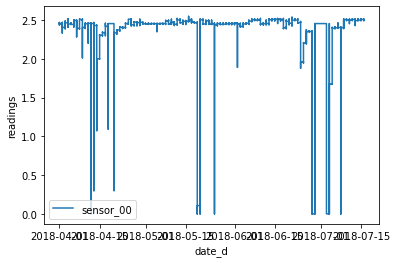

<Figure size 720x1440 with 0 Axes>

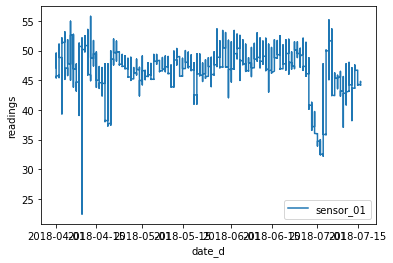

<Figure size 720x1440 with 0 Axes>

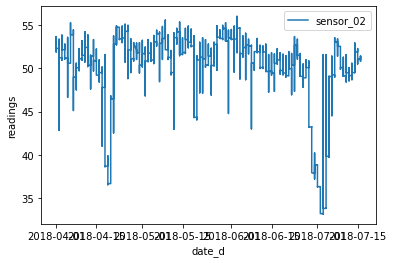

<Figure size 720x1440 with 0 Axes>

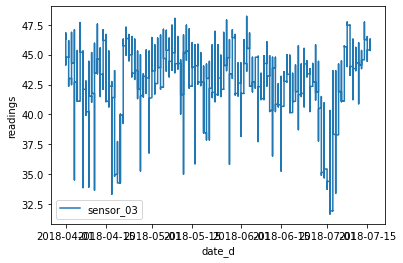

<Figure size 720x1440 with 0 Axes>

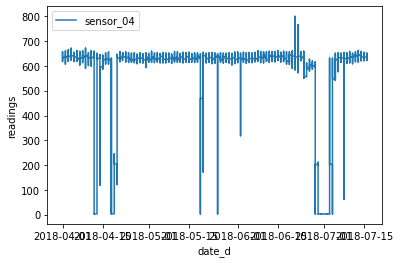

<Figure size 720x1440 with 0 Axes>

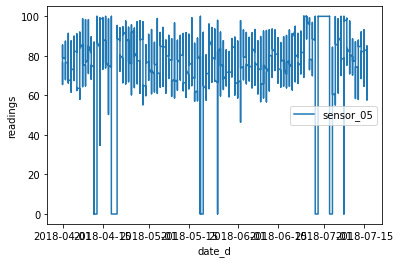

<Figure size 720x1440 with 0 Axes>

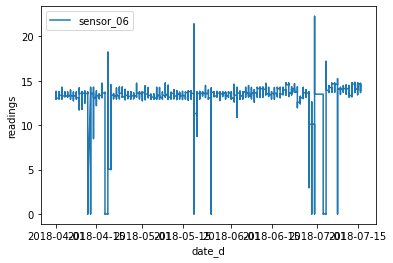

<Figure size 720x1440 with 0 Axes>

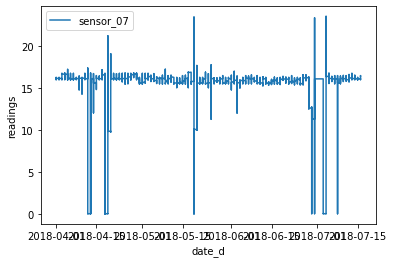

<Figure size 720x1440 with 0 Axes>

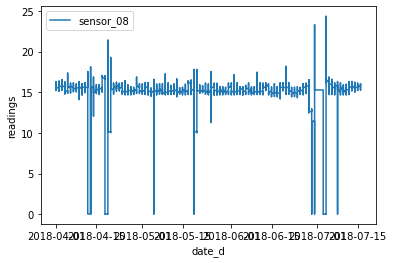

<Figure size 720x1440 with 0 Axes>

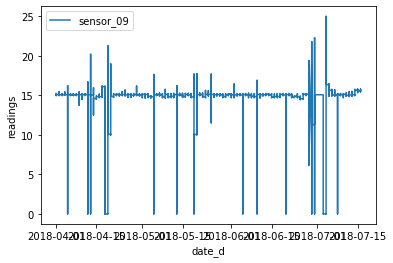

<Figure size 720x1440 with 0 Axes>

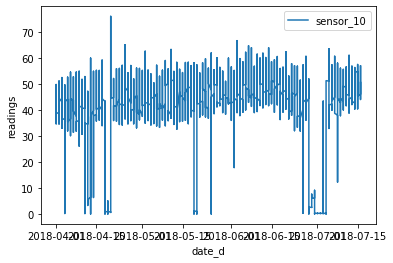

<Figure size 720x1440 with 0 Axes>

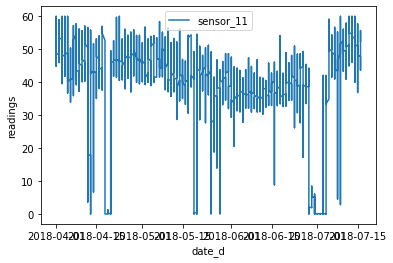

<Figure size 720x1440 with 0 Axes>

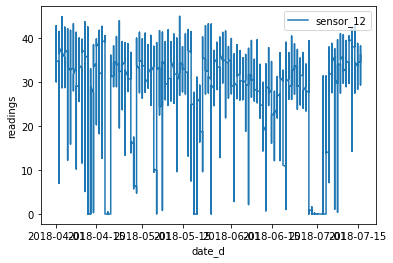

<Figure size 720x1440 with 0 Axes>

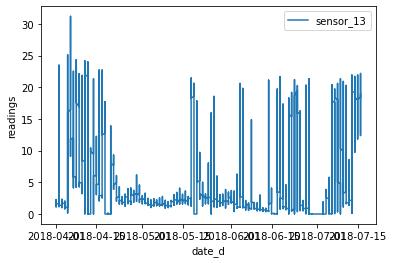

<Figure size 720x1440 with 0 Axes>

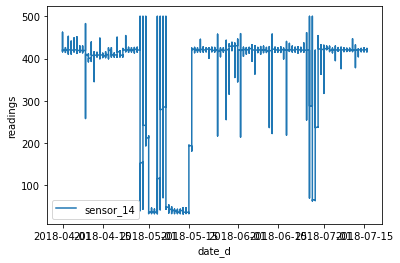

<Figure size 720x1440 with 0 Axes>

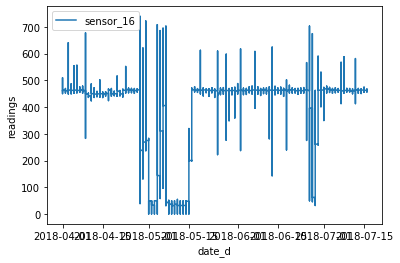

<Figure size 720x1440 with 0 Axes>

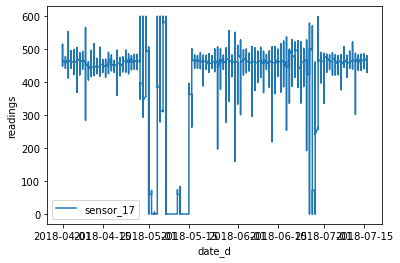

<Figure size 720x1440 with 0 Axes>

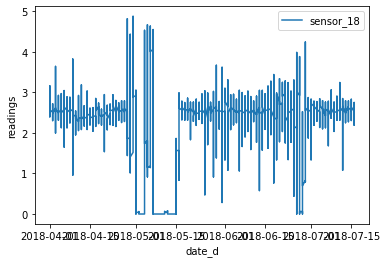

<Figure size 720x1440 with 0 Axes>

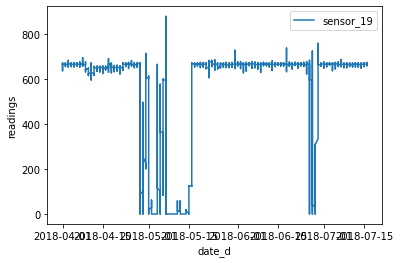

<Figure size 720x1440 with 0 Axes>

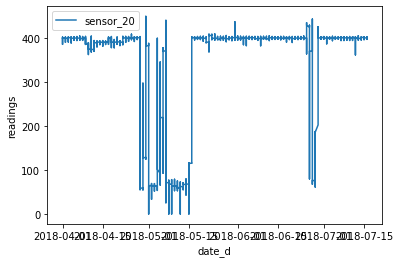

<Figure size 720x1440 with 0 Axes>

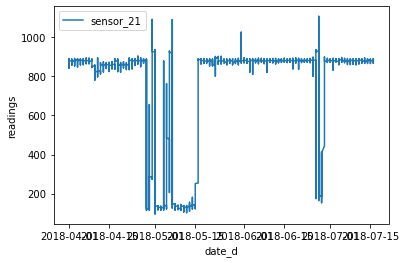

<Figure size 720x1440 with 0 Axes>

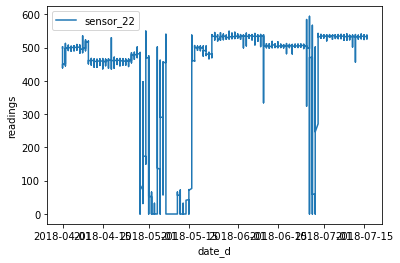

<Figure size 720x1440 with 0 Axes>

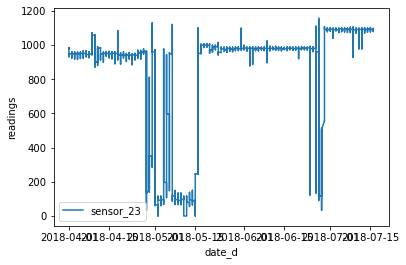

<Figure size 720x1440 with 0 Axes>

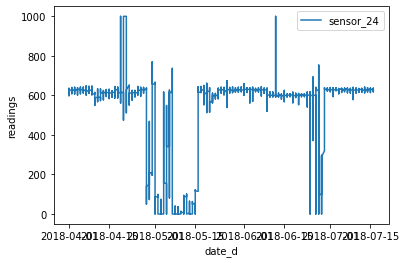

<Figure size 720x1440 with 0 Axes>

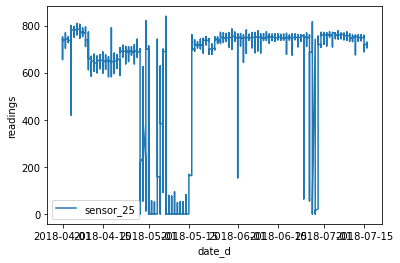

<Figure size 720x1440 with 0 Axes>

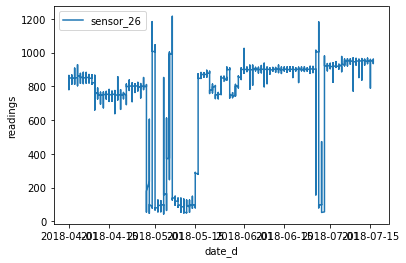

<Figure size 720x1440 with 0 Axes>

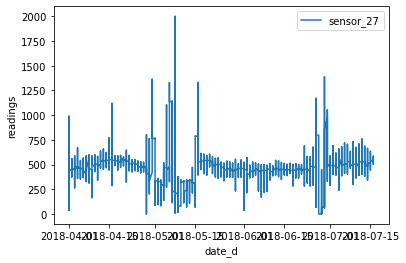

<Figure size 720x1440 with 0 Axes>

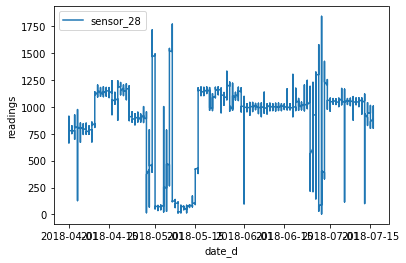

<Figure size 720x1440 with 0 Axes>

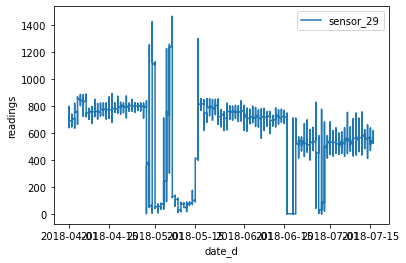

<Figure size 720x1440 with 0 Axes>

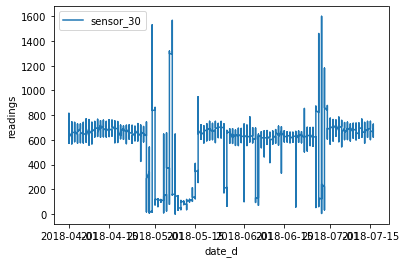

<Figure size 720x1440 with 0 Axes>

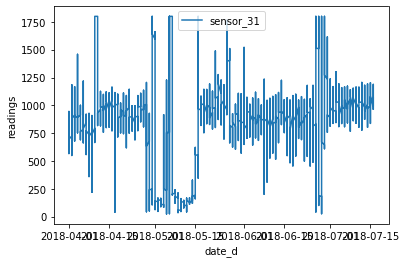

<Figure size 720x1440 with 0 Axes>

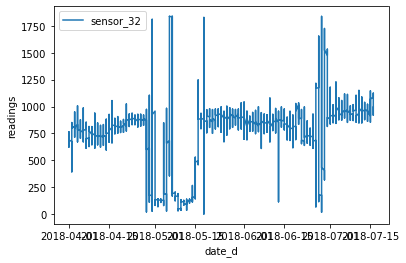

<Figure size 720x1440 with 0 Axes>

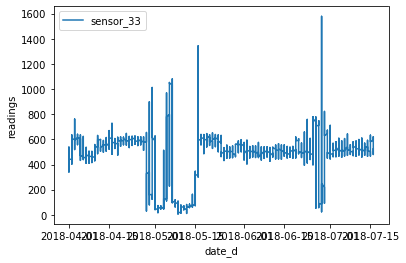

<Figure size 720x1440 with 0 Axes>

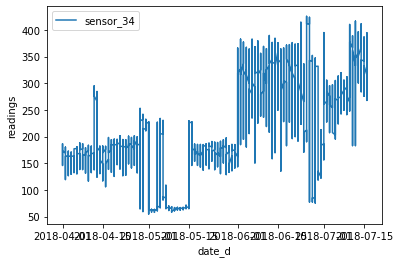

<Figure size 720x1440 with 0 Axes>

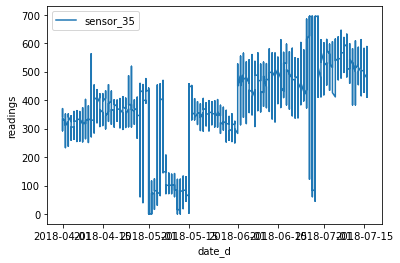

<Figure size 720x1440 with 0 Axes>

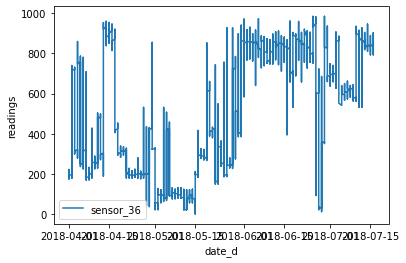

<Figure size 720x1440 with 0 Axes>

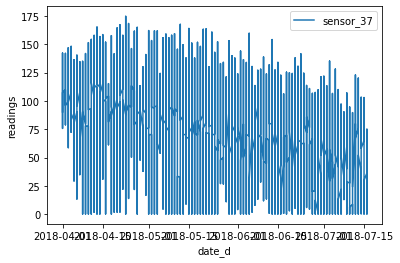

<Figure size 720x1440 with 0 Axes>

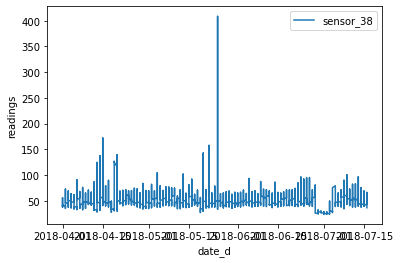

<Figure size 720x1440 with 0 Axes>

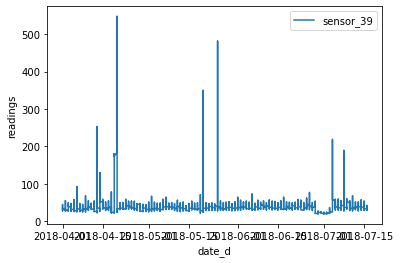

<Figure size 720x1440 with 0 Axes>

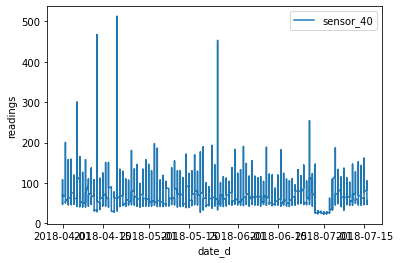

<Figure size 720x1440 with 0 Axes>

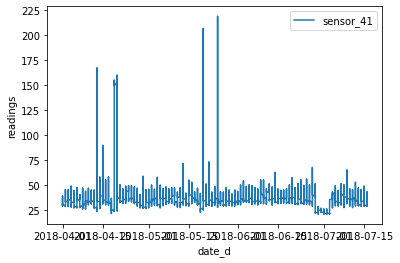

<Figure size 720x1440 with 0 Axes>

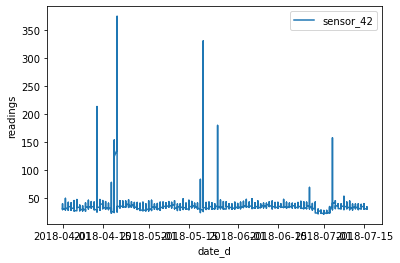

<Figure size 720x1440 with 0 Axes>

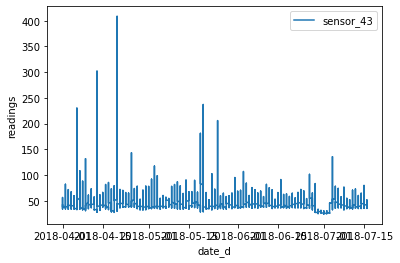

<Figure size 720x1440 with 0 Axes>

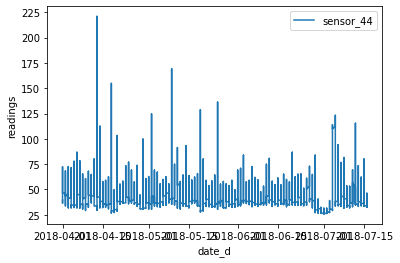

<Figure size 720x1440 with 0 Axes>

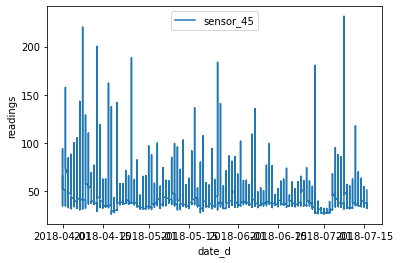

<Figure size 720x1440 with 0 Axes>

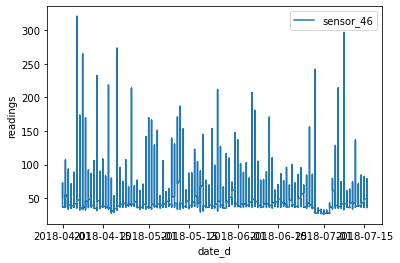

<Figure size 720x1440 with 0 Axes>

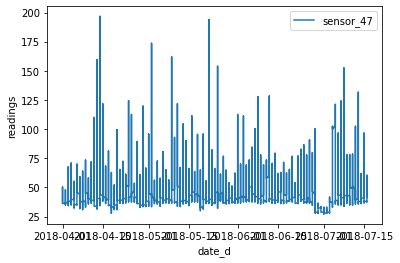

<Figure size 720x1440 with 0 Axes>

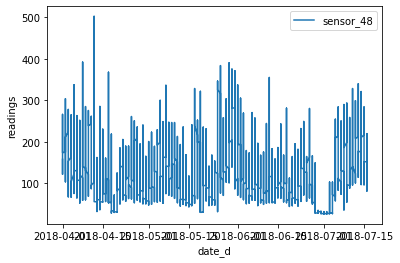

<Figure size 720x1440 with 0 Axes>

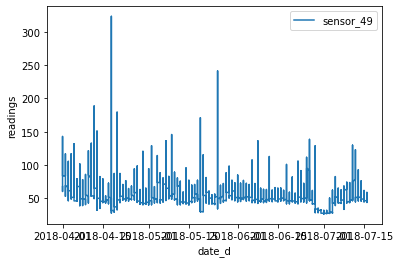

<Figure size 720x1440 with 0 Axes>

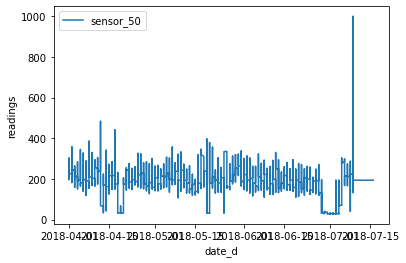

<Figure size 720x1440 with 0 Axes>

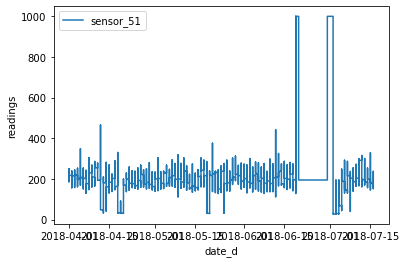

In [23]:
for column in numeric_columns:
    plt.figure(figsize=(10,20))
    data.plot('date_d',column)
    plt.ylabel('readings')
    plt.show()

In [24]:
data.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,...,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000,153104.000000
mean,2.343010,47.138313,50.518146,43.237968,573.028254,74.646911,12.992274,15.558300,14.943006,14.610252,...,35.915929,43.014093,39.963996,41.052023,44.723489,42.818303,115.724568,52.427407,183.741678,202.414233
std,0.463287,3.504892,4.263789,2.652477,167.485246,20.144203,2.370678,2.536655,2.341829,2.428048,...,11.780232,12.064413,7.375339,10.150785,13.249319,8.487617,60.101467,13.578103,63.190809,124.148824
min,0.000000,22.439240,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.433912,46.093750,50.086800,42.274300,624.305500,72.989137,13.266780,15.704570,15.118630,14.901620,...,32.812500,39.062500,36.168980,36.458330,39.062500,38.773148,70.891200,46.585648,169.849500,179.108800
50%,2.455556,47.786460,51.605900,43.663190,631.250000,77.962645,13.498260,16.131360,15.292240,15.082470,...,35.416660,42.187500,39.062500,39.351850,42.534721,41.666670,103.298600,50.636574,193.865700,195.023100
75%,2.485070,49.088540,52.907990,44.921880,636.458400,82.909275,13.650170,16.203700,15.567130,15.118630,...,38.020830,45.833330,42.534720,43.402779,47.453700,45.428240,153.645800,56.134260,217.592600,211.226900
max,2.549016,55.772570,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,221.064800,231.481500,320.891200,196.759300,502.314800,323.206000,1000.000000,1000.000000


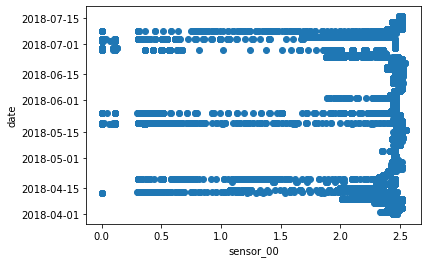

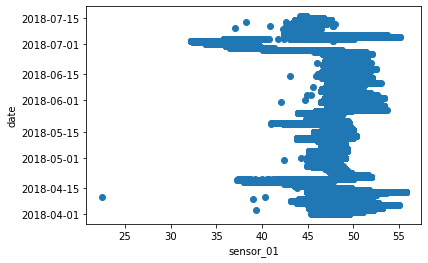

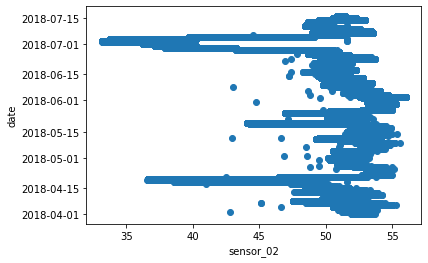

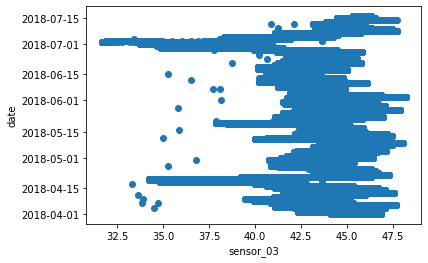

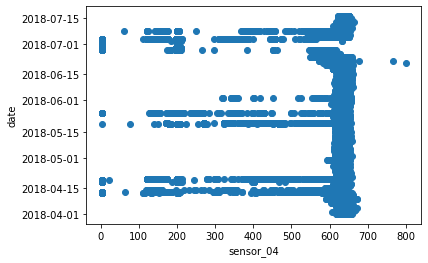

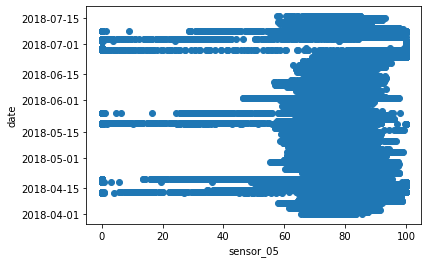

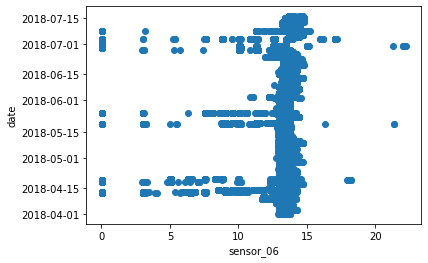

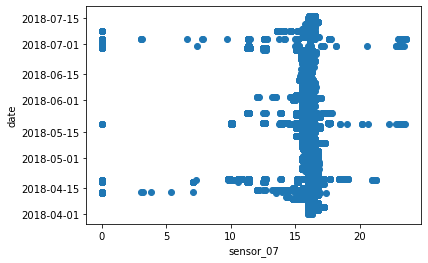

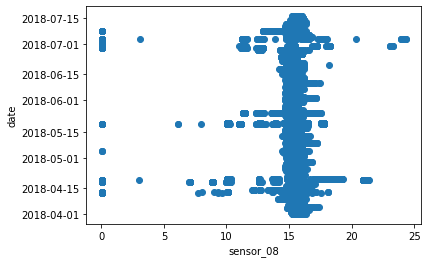

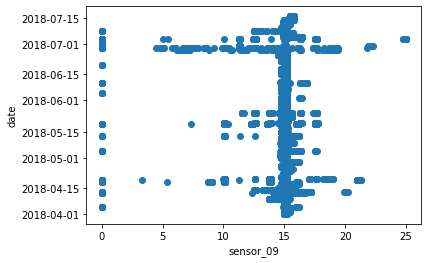

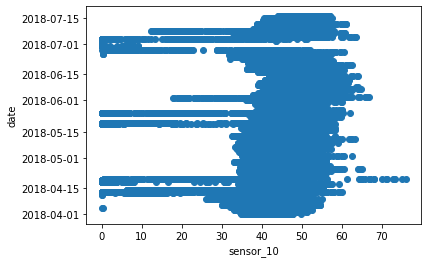

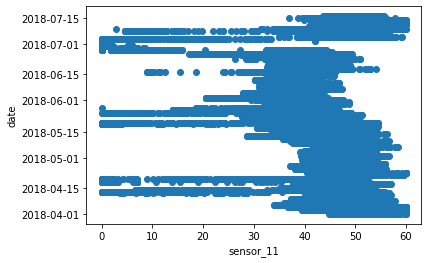

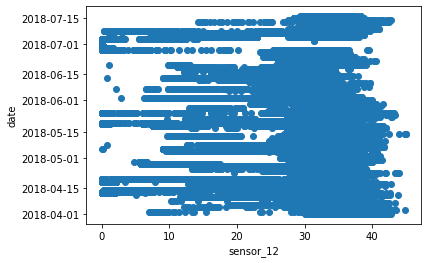

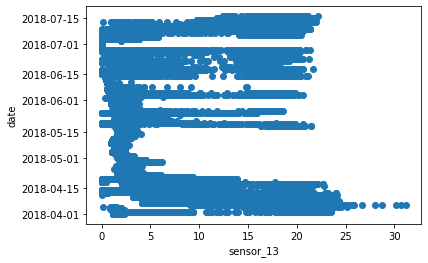

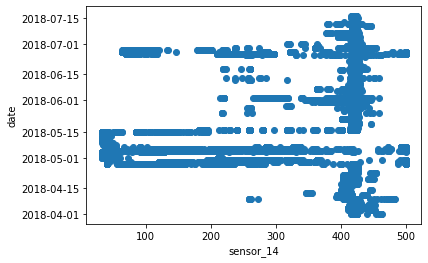

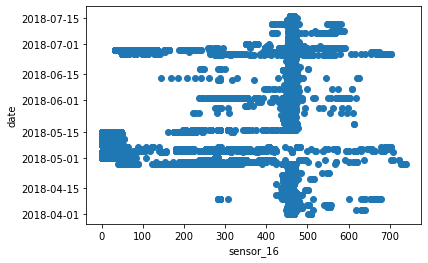

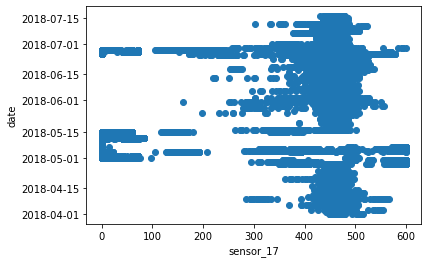

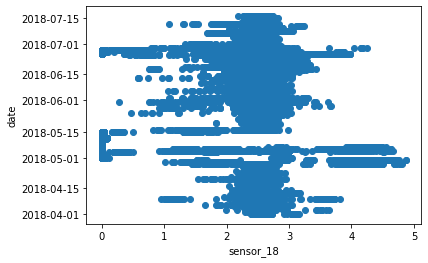

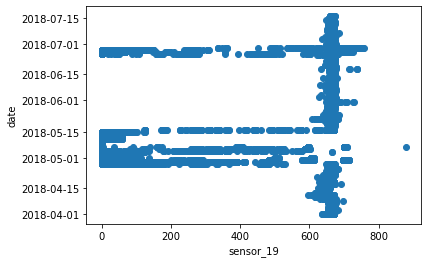

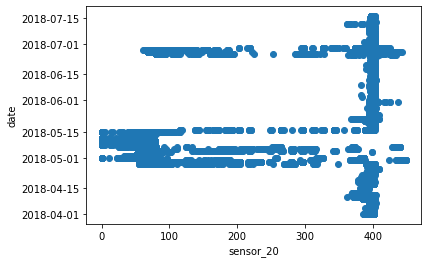

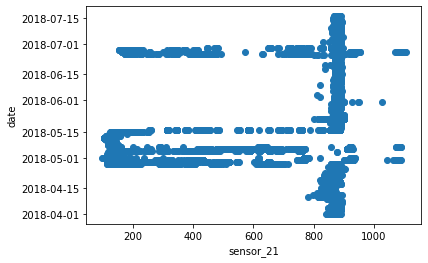

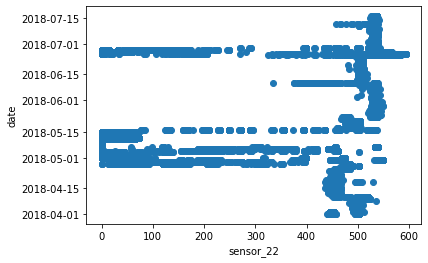

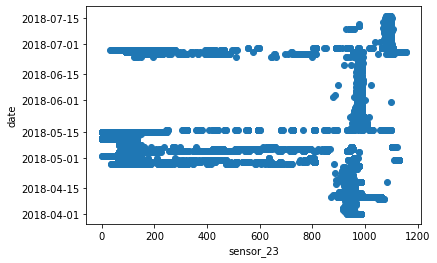

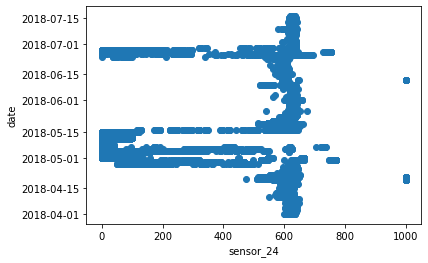

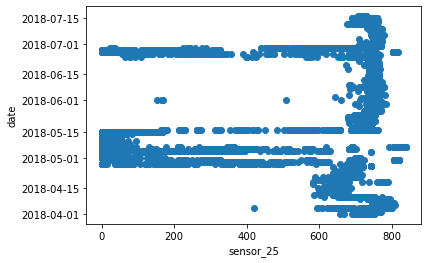

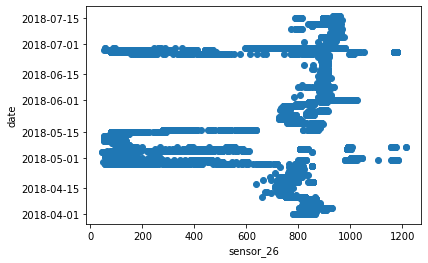

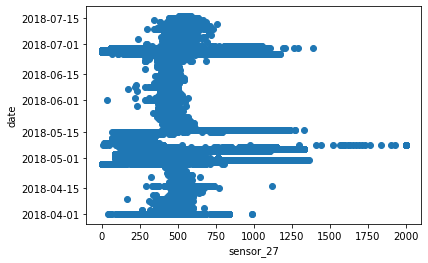

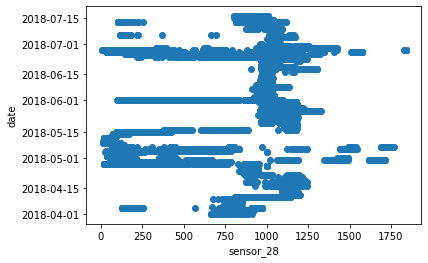

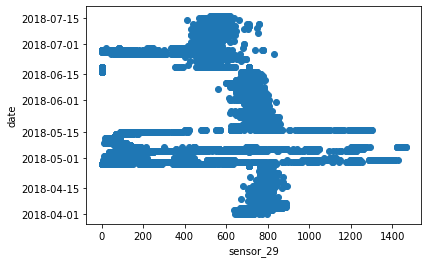

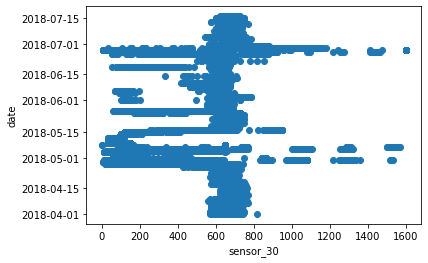

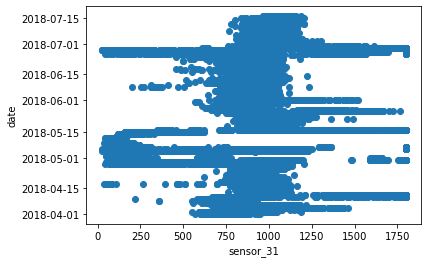

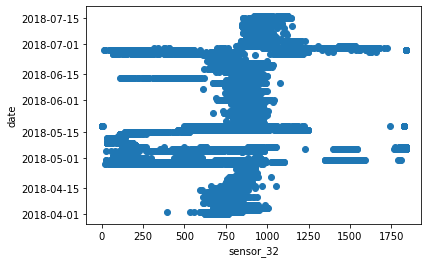

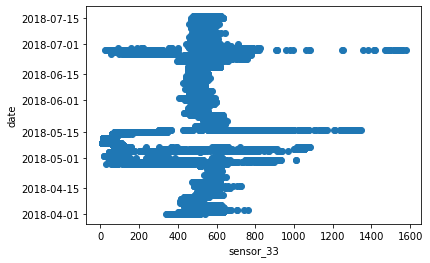

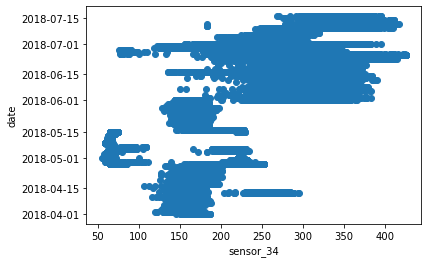

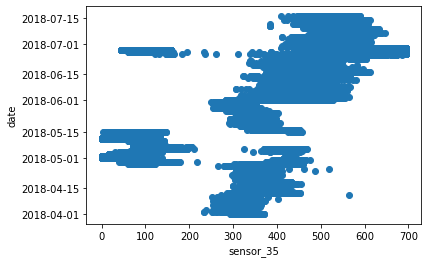

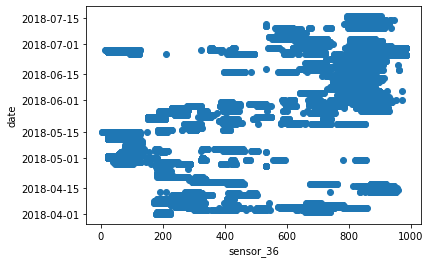

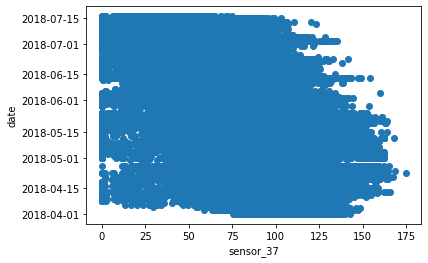

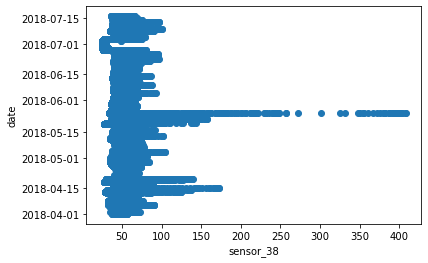

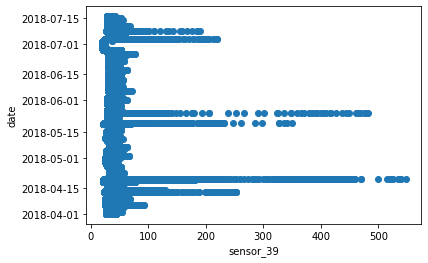

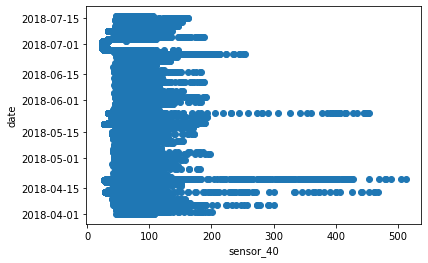

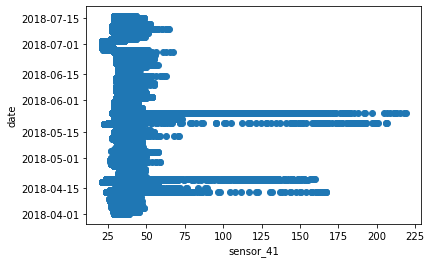

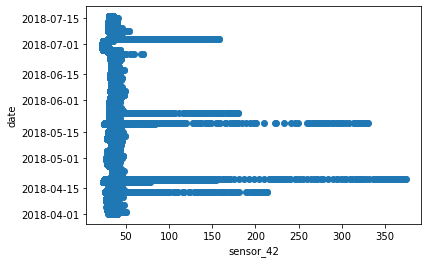

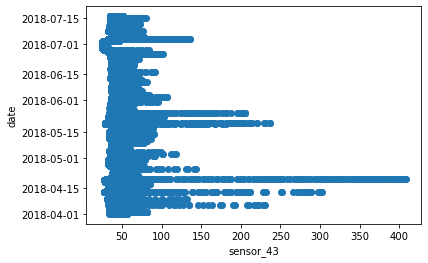

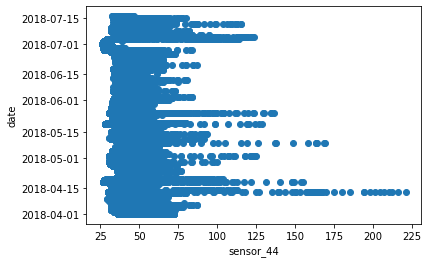

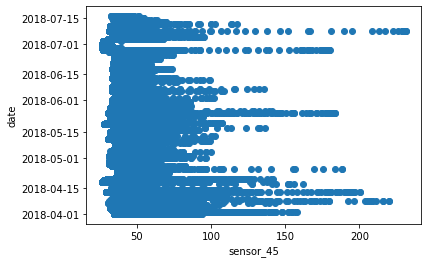

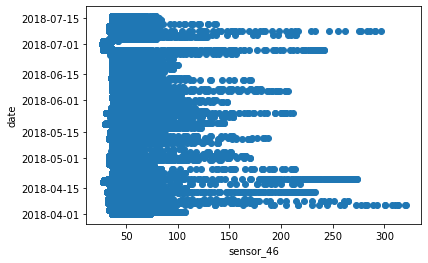

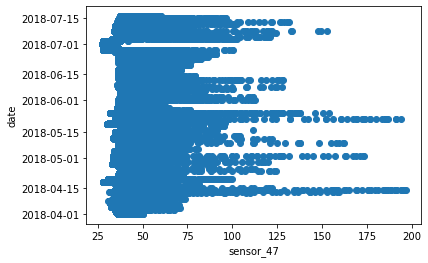

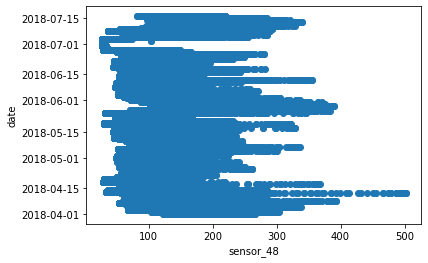

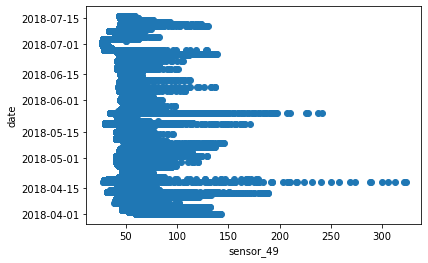

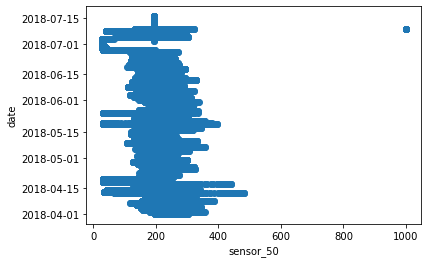

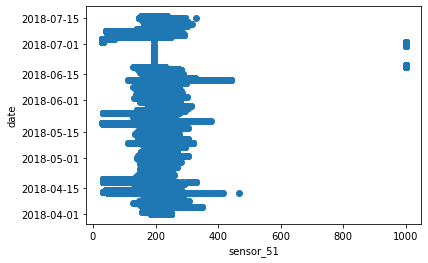

In [25]:
for column in numeric_columns:
    plt.scatter(column,'date_d',data=data,)
    plt.xlabel(column)
    plt.ylabel('date')
    plt.show()

### Handling Outliers

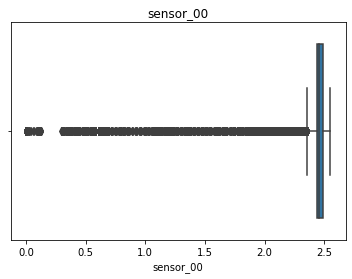

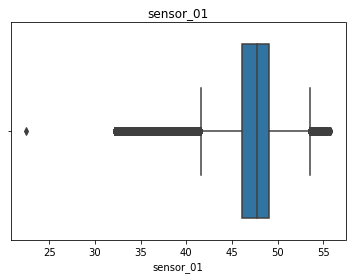

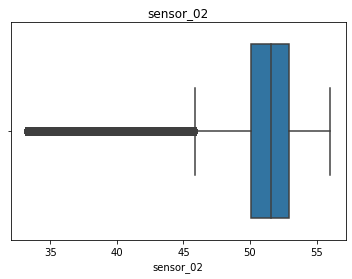

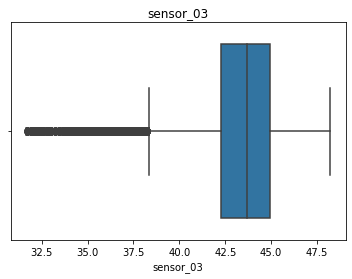

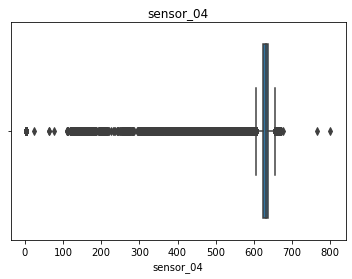

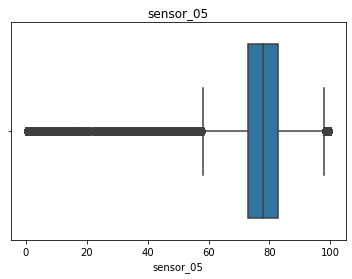

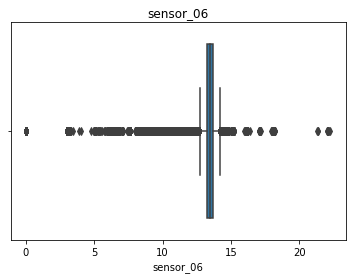

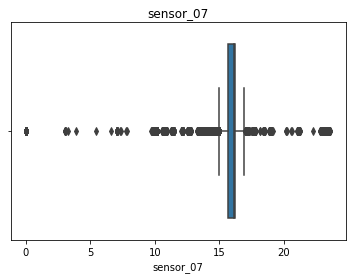

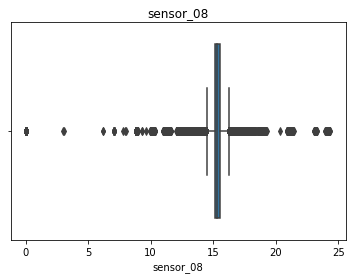

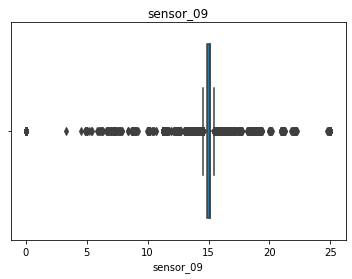

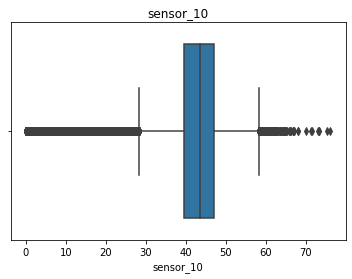

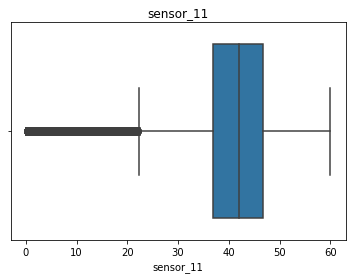

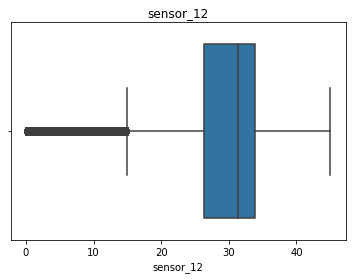

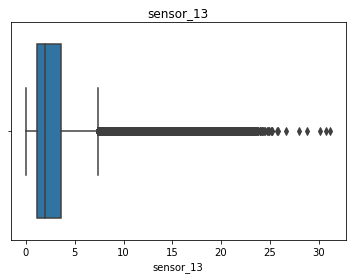

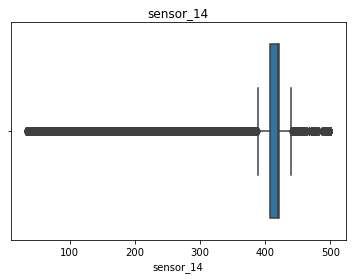

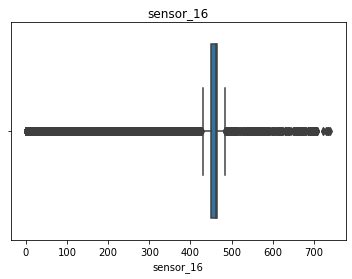

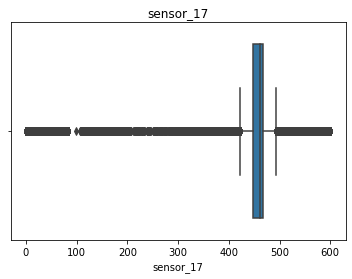

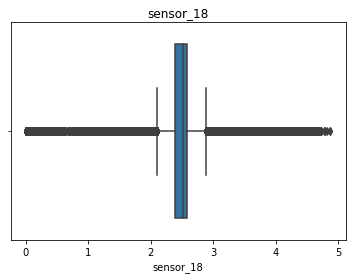

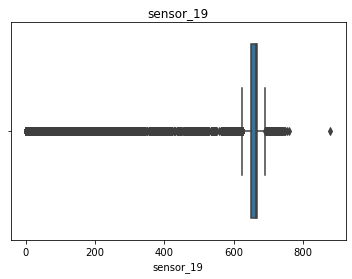

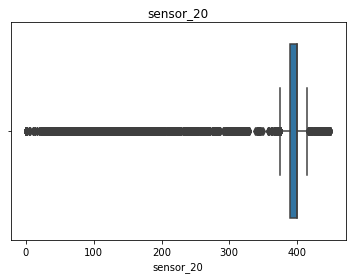

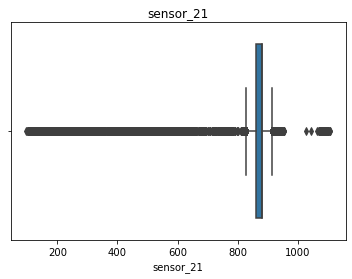

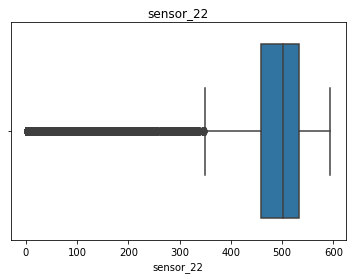

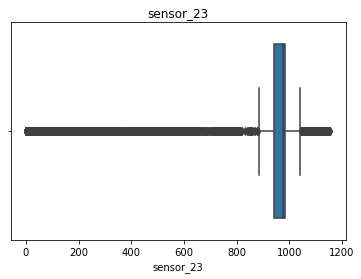

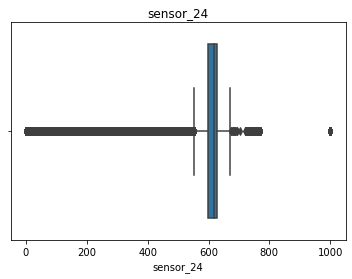

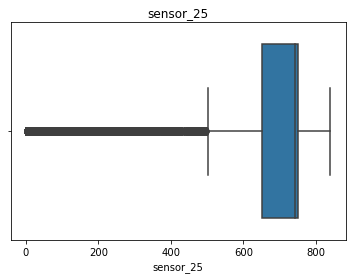

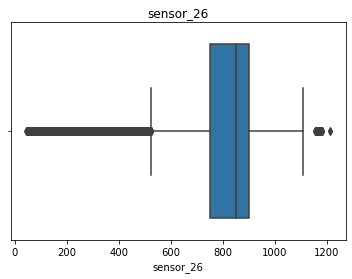

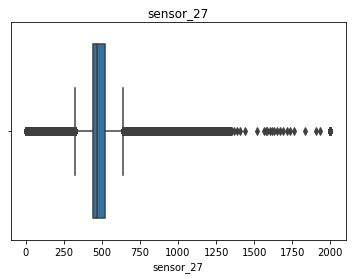

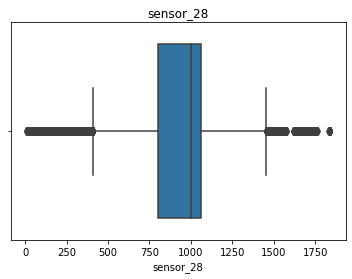

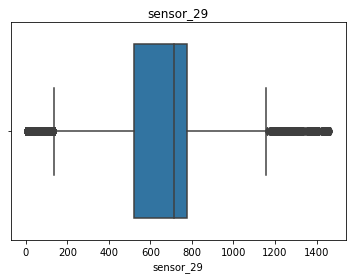

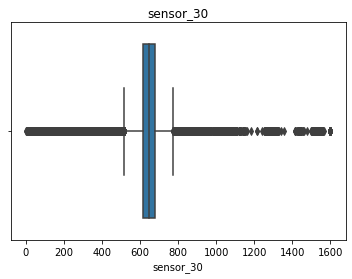

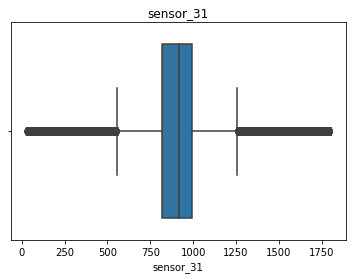

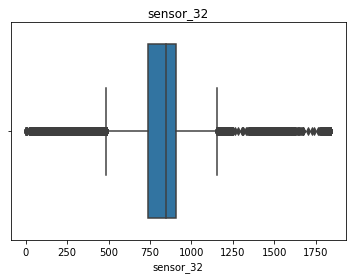

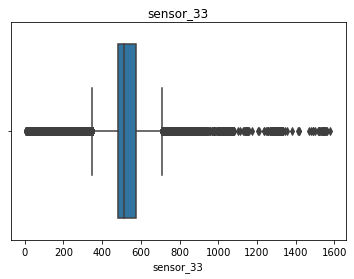

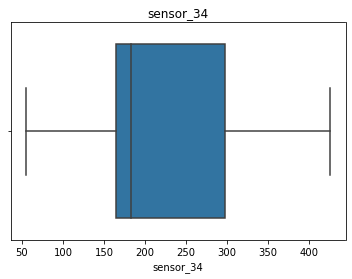

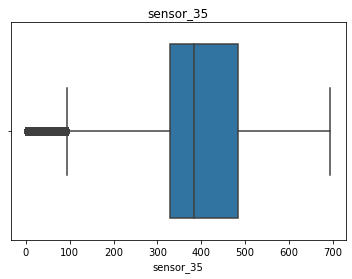

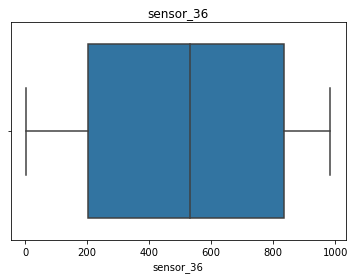

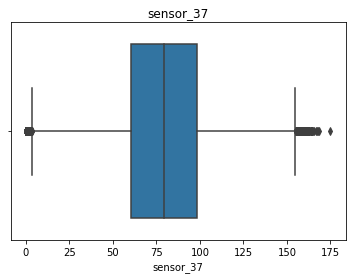

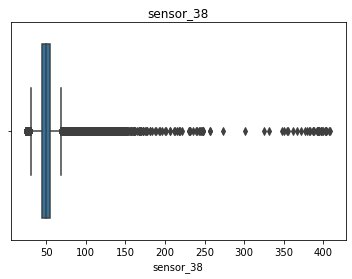

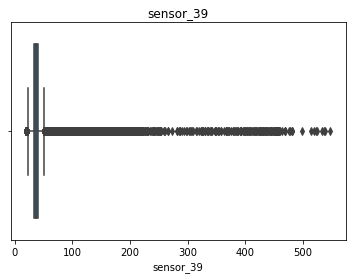

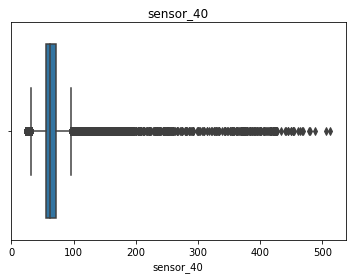

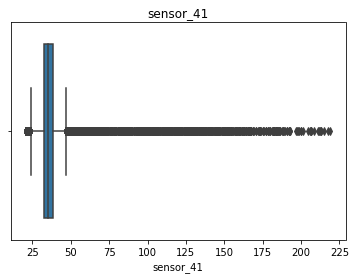

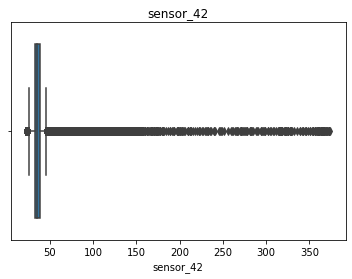

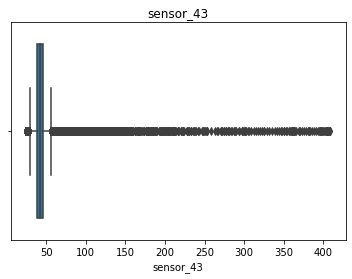

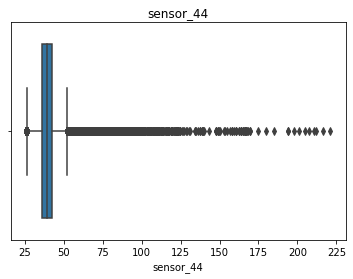

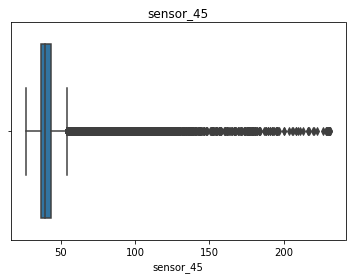

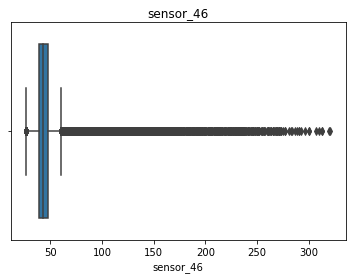

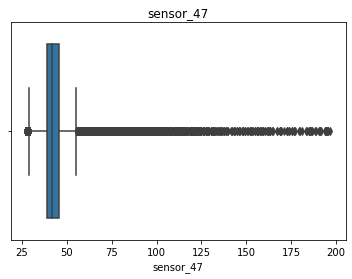

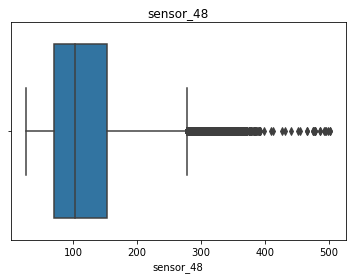

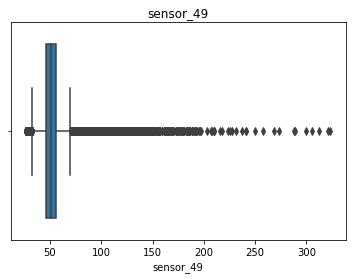

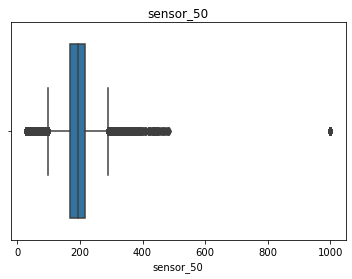

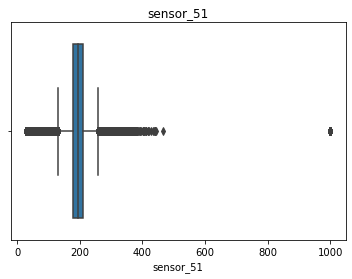

In [26]:
for column in numeric_columns:
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

In [27]:
for column in numeric_columns:
    q1=np.percentile(data[column],25,interpolation='midpoint')
    q3=np.percentile(data[column],75,interpolation='midpoint')
    iqr=q3-q1
    u_l=q3+1.5*iqr
    l_l=q1-1.5*iqr
    data[column].mask(data[column]<l_l,l_l,inplace=True)
    data[column].mask(data[column]>u_l,u_l,inplace=True)
    

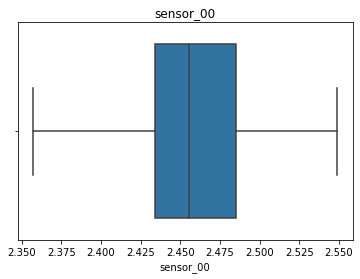

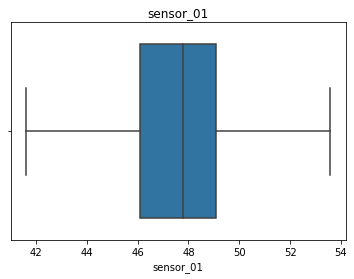

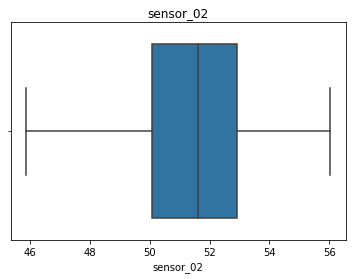

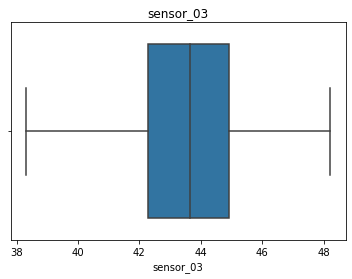

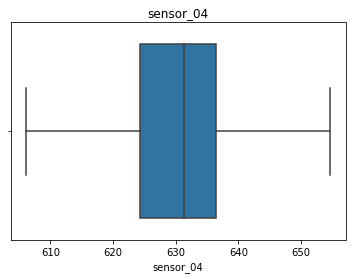

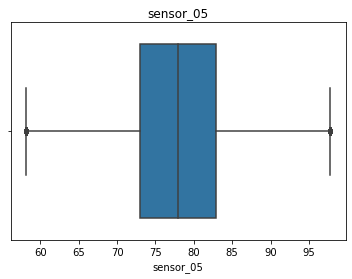

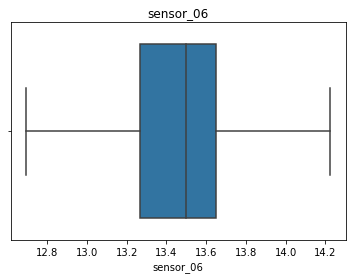

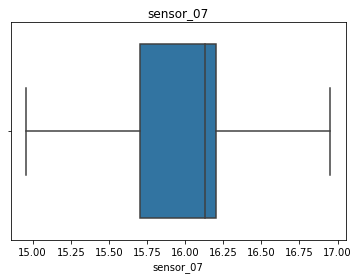

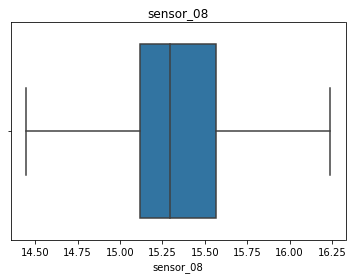

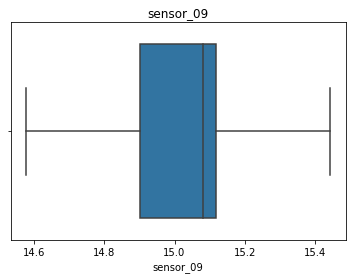

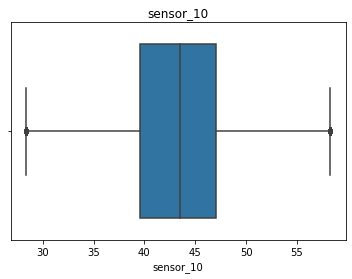

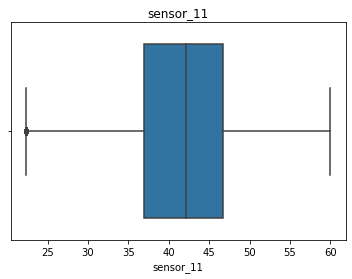

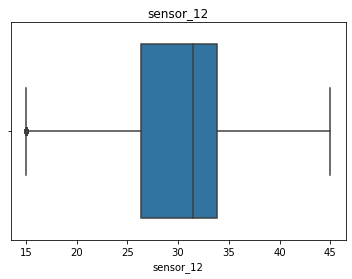

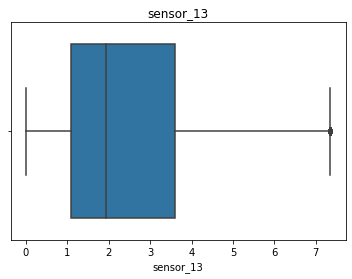

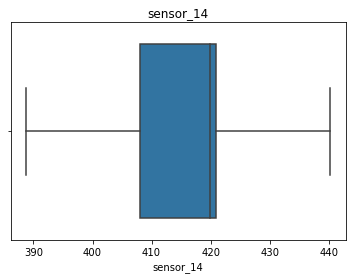

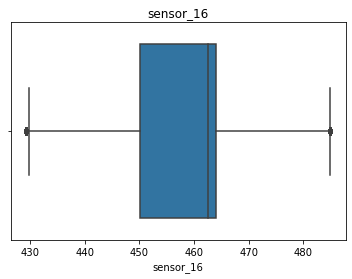

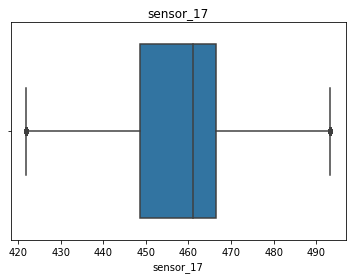

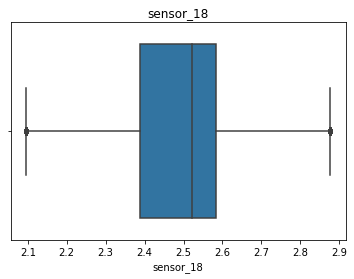

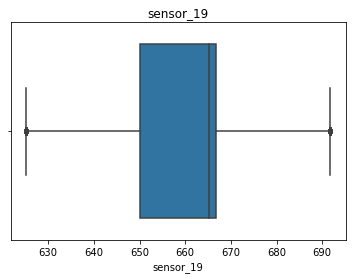

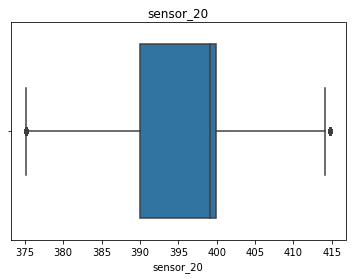

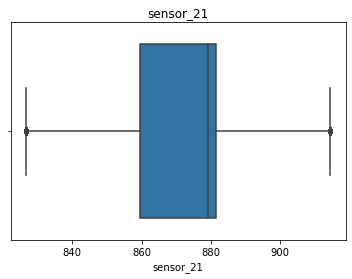

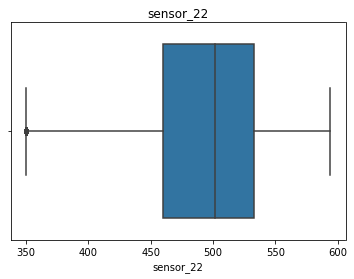

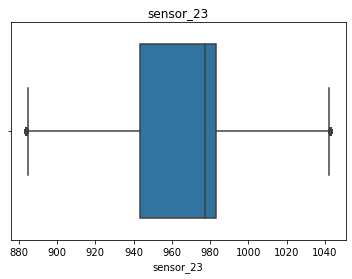

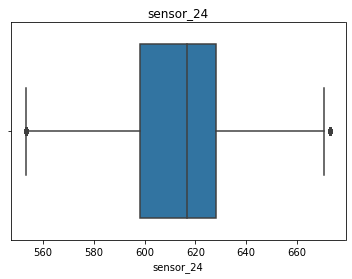

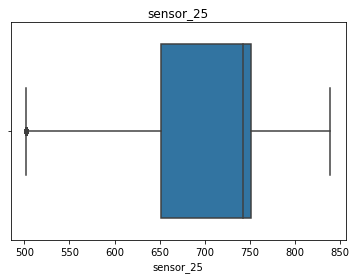

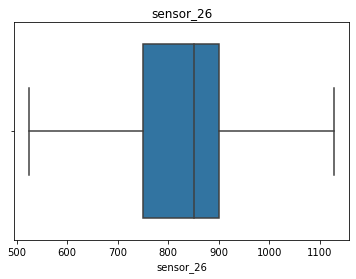

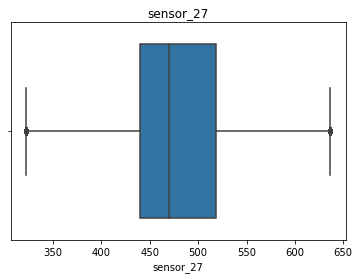

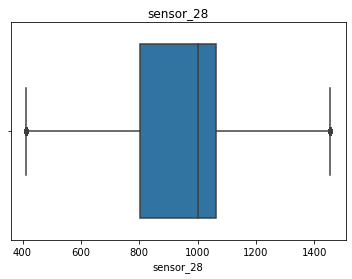

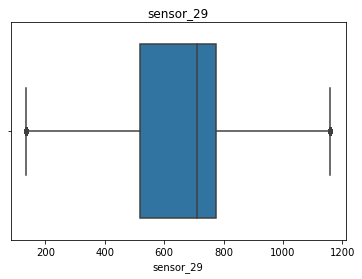

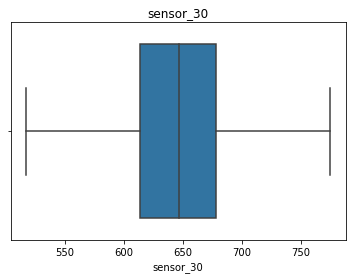

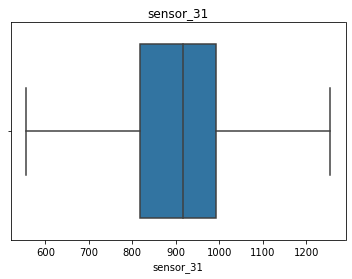

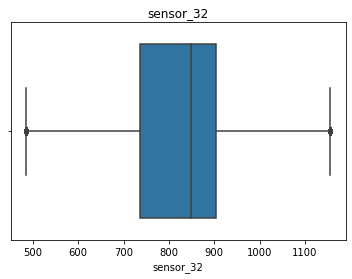

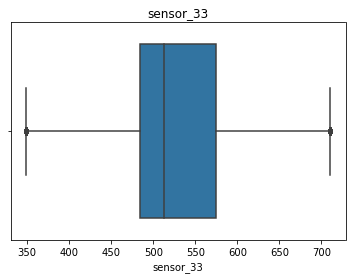

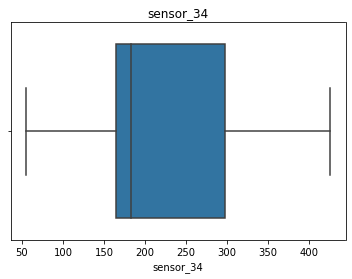

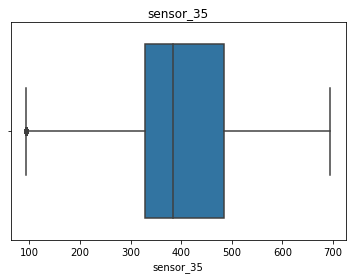

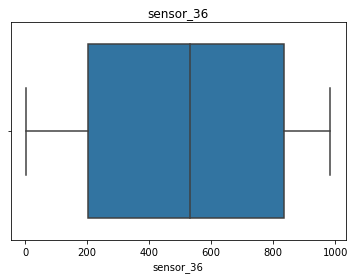

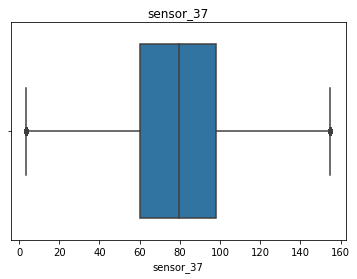

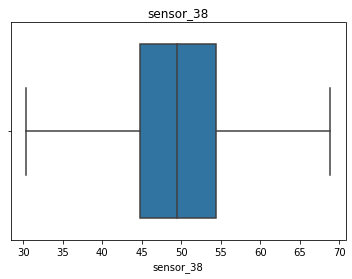

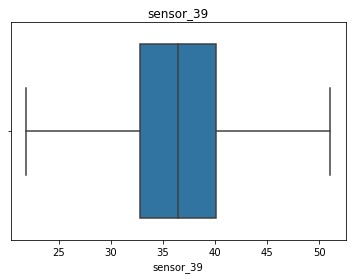

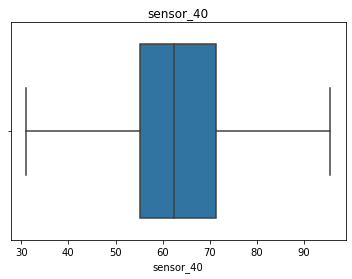

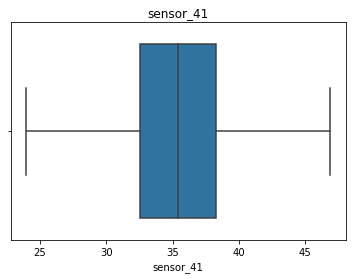

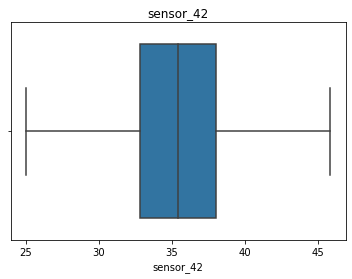

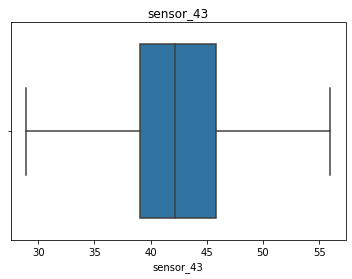

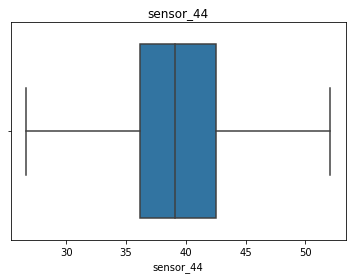

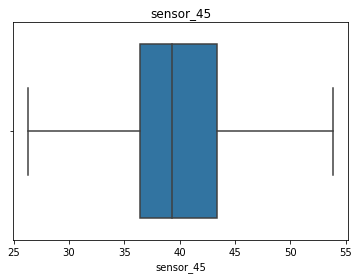

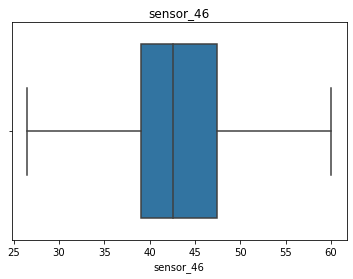

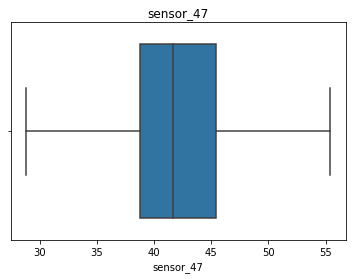

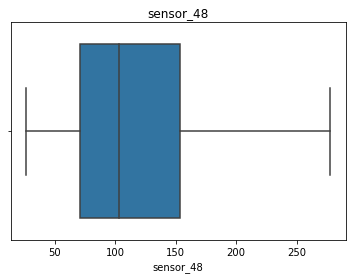

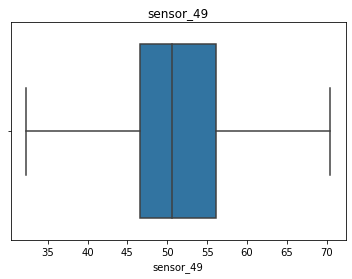

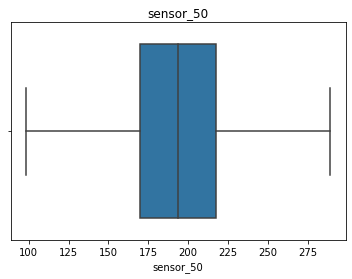

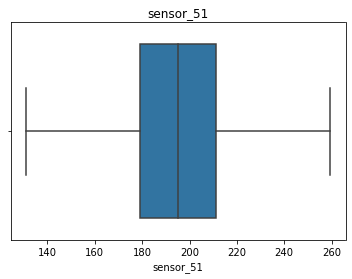

In [28]:
for column in numeric_columns:
    sns.boxplot(data[column])
    plt.title(column)
    plt.show()

### Scaling Data

In [29]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data[numeric_columns]=scaler.fit_transform(data[numeric_columns])
data[numeric_columns]=pd.DataFrame(data[numeric_columns],columns=data[numeric_columns].columns)
data.head()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status,date_d,time_d
0,0.345022,-0.138674,0.853491,1.346179,0.497424,-0.157914,-0.167685,0.359631,0.676353,0.158413,...,2.26278,1.022800,-0.694823,0.720350,1.765617,1.161494,0.232569,NORMAL,2018-04-01,00:00:00
1,0.345022,-0.138674,0.853491,1.346179,0.497424,-0.157914,-0.167685,0.359631,0.676353,0.158413,...,2.26278,1.022800,-0.694823,0.720350,1.765617,1.161494,0.232569,NORMAL,2018-04-01,00:01:00
2,-0.089271,-0.038388,0.853491,1.386452,0.879242,-0.468993,-0.383951,0.126112,0.811200,-0.067554,...,2.26278,1.063281,-0.694823,0.686075,1.703067,1.123426,0.308778,NORMAL,2018-04-01,00:02:00
3,0.241599,-0.138674,0.835218,1.386450,-0.031246,-0.101413,-0.401962,0.647089,1.023082,0.309092,...,2.26278,1.063281,-0.694823,0.686075,1.671792,1.104394,0.289726,NORMAL,2018-04-01,00:03:00
4,-0.068586,-0.121961,0.853491,1.386450,0.673645,-0.144119,-0.311854,0.557263,1.023082,0.309092,...,2.26278,1.144242,-0.595706,0.725247,1.640517,1.142460,0.232569,NORMAL,2018-04-01,00:04:00


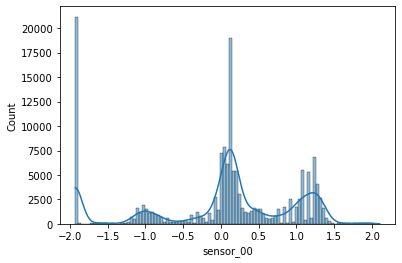

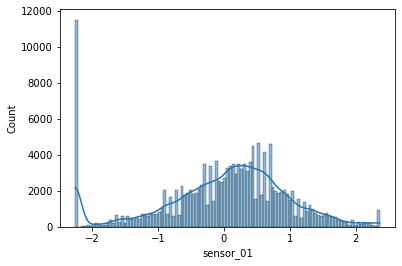

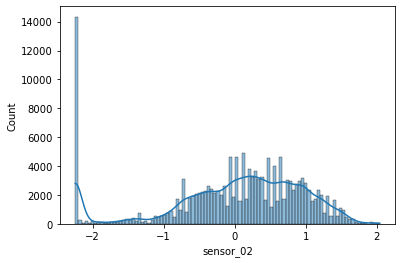

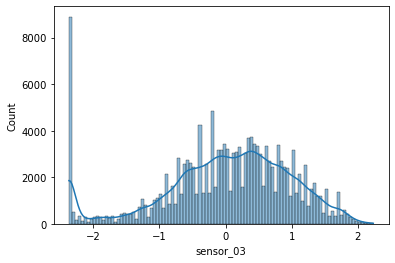

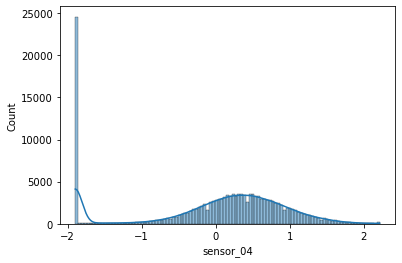

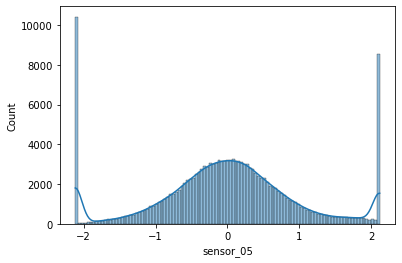

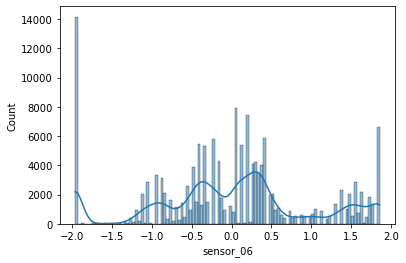

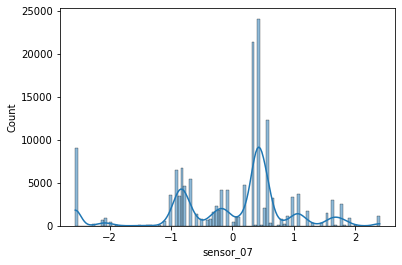

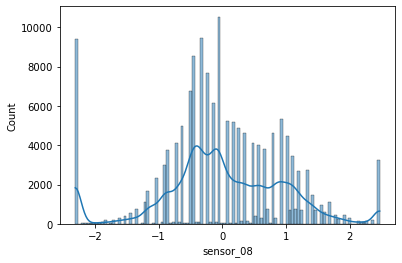

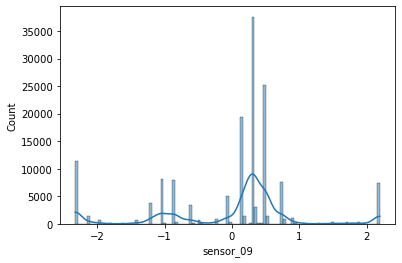

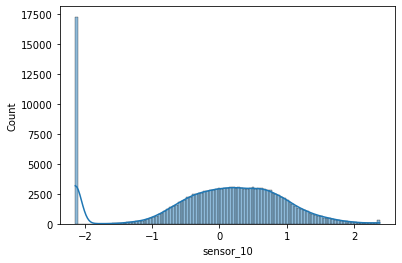

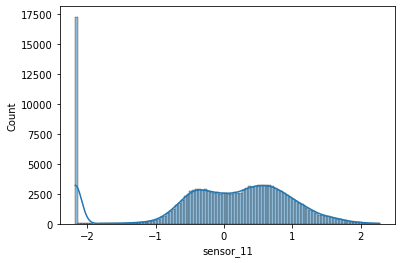

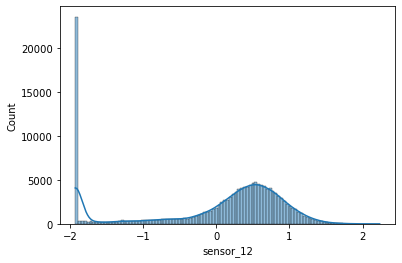

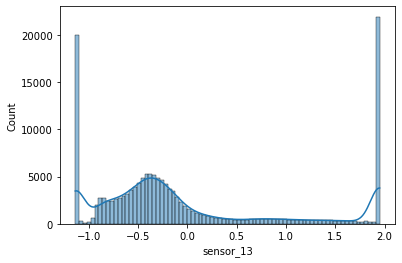

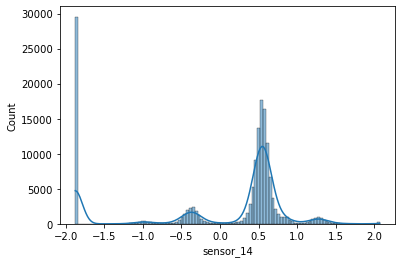

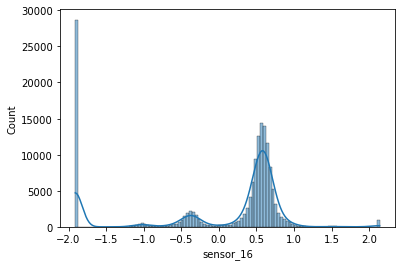

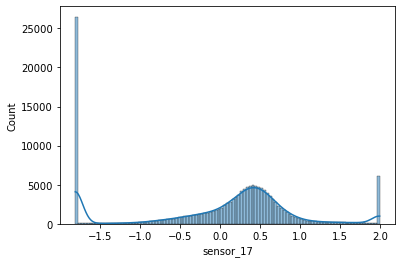

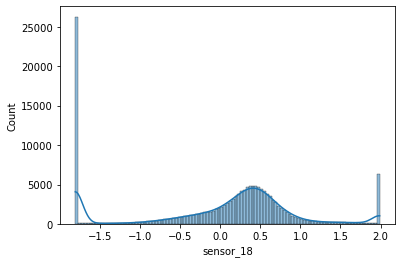

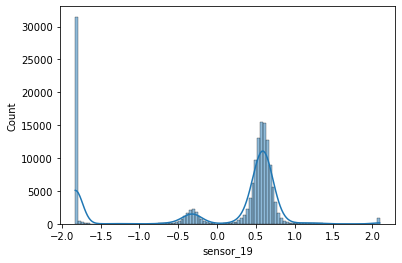

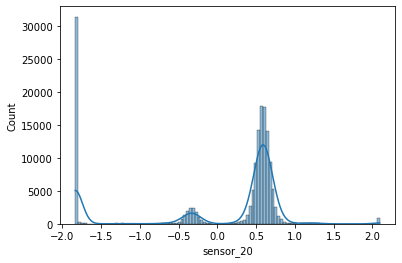

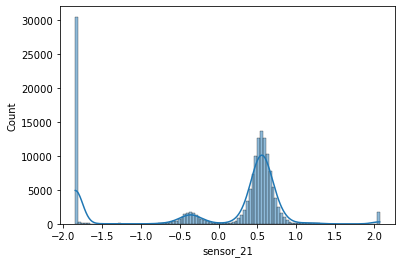

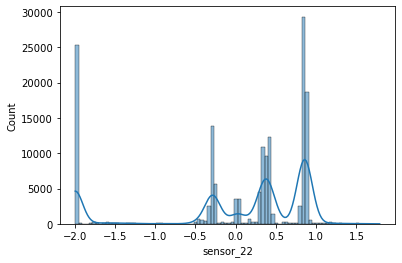

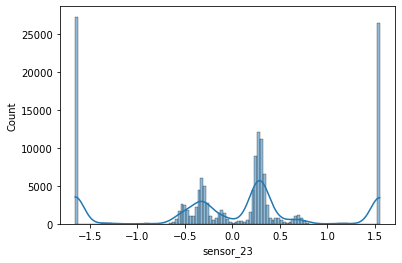

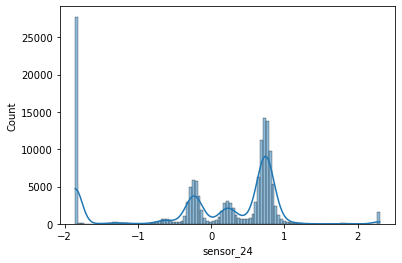

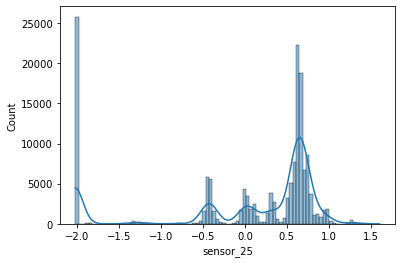

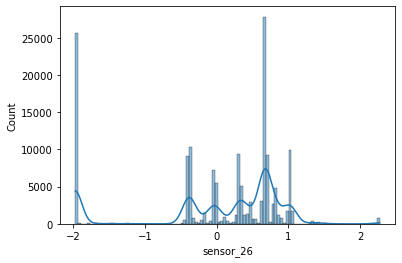

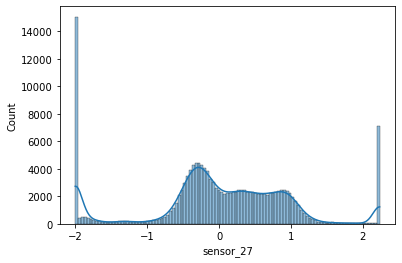

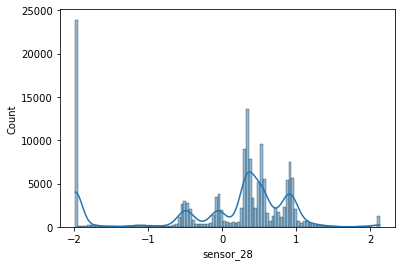

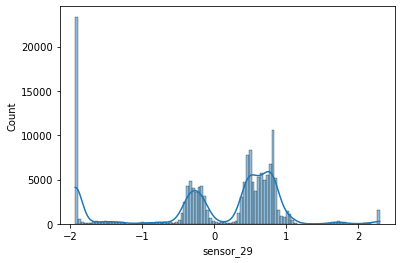

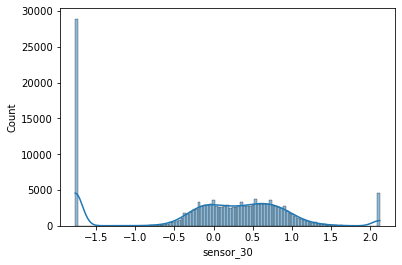

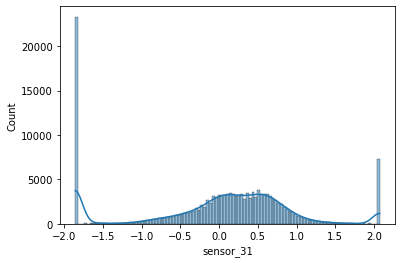

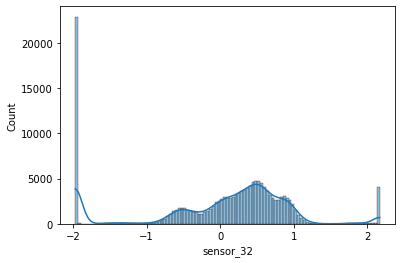

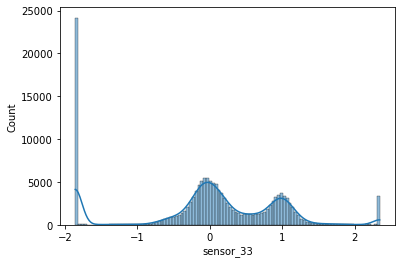

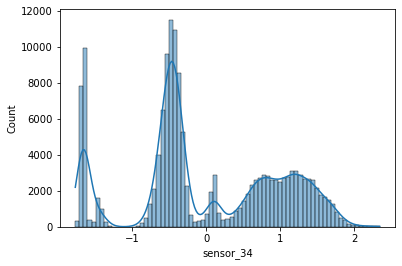

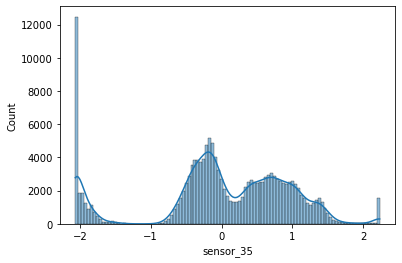

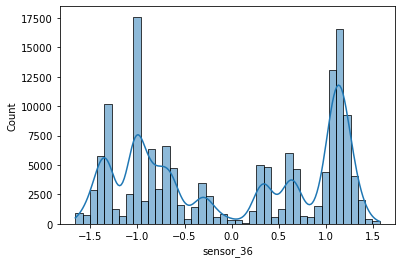

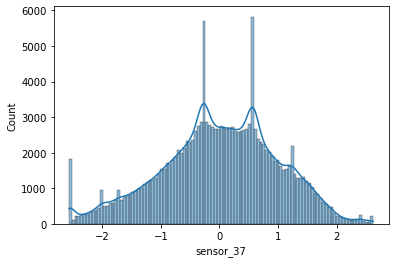

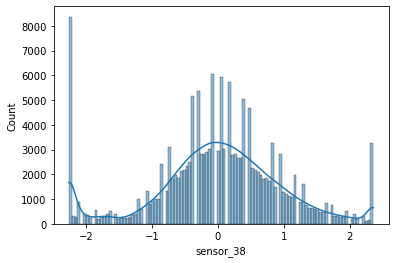

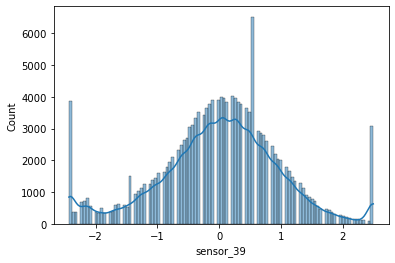

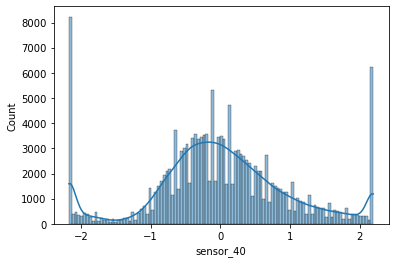

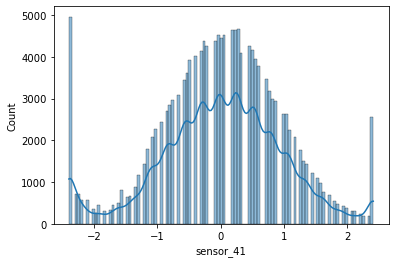

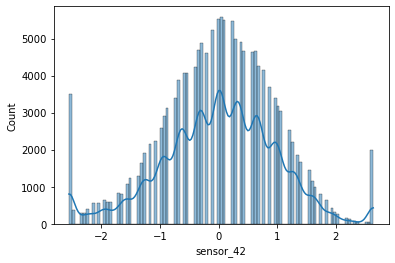

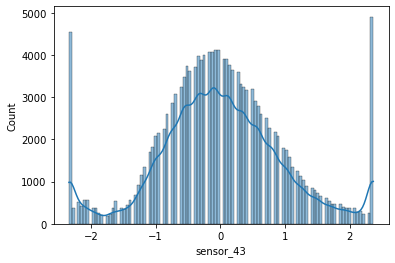

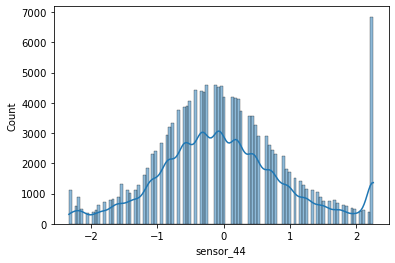

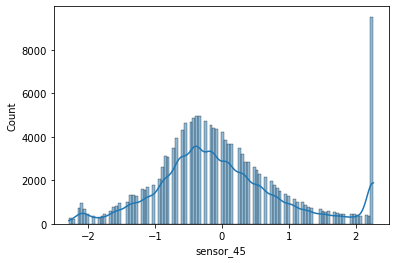

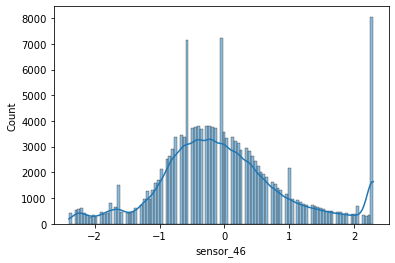

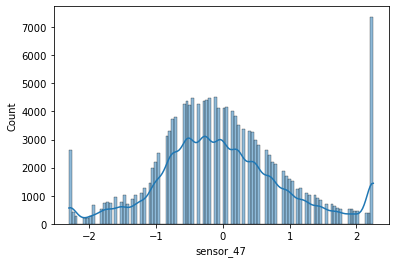

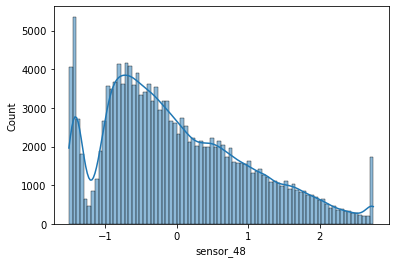

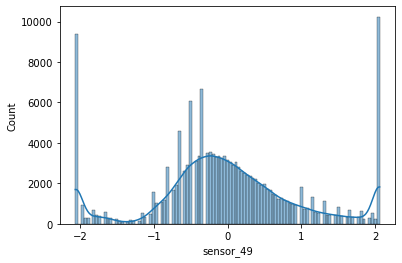

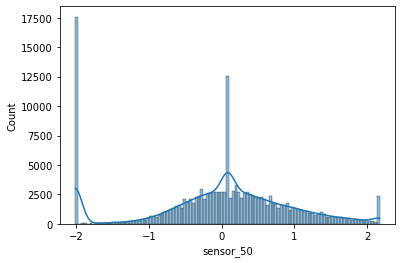

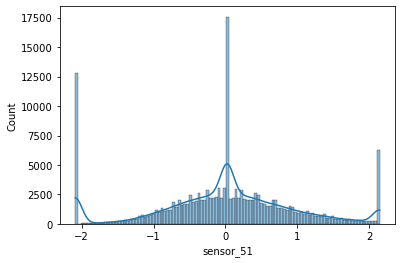

In [30]:
for column in numeric_columns:
    sns.histplot(data[column],kde=True)
    plt.xlabel(column)
    plt.show()

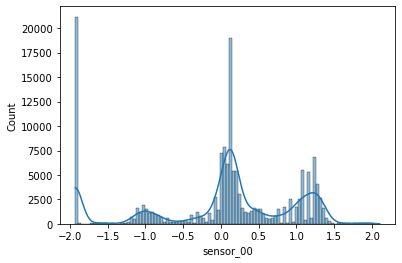

In [31]:
sns.histplot(data['sensor_00'],kde=True)
plt.savefig('sensor00box.jpg')

### Encoding Object Columns

<AxesSubplot:>

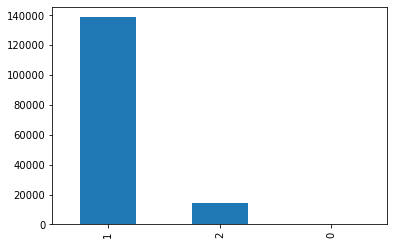

In [32]:
from sklearn import preprocessing
l_e=preprocessing.LabelEncoder()
data['machine_status']=l_e.fit_transform(data['machine_status'])
data['machine_status'].value_counts().plot(kind='bar')

### Splitting Dataset

In [33]:
x=data[numeric_columns]
y=data['machine_status']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
print('train_data-x shape',x_train.shape)
print('train data-y shape',y_train.shape)
print('test data-x shape',x_test.shape)
print('test data-y shape',y_test.shape)

train_data-x shape (122483, 51)
train data-y shape (122483,)
test data-x shape (30621, 51)
test data-y shape (30621,)


### Training Models 

In [40]:
## Linear Regression Model

In [34]:
from sklearn import linear_model
lr=linear_model.LinearRegression()
lrmodel=lr.fit(x_train,y_train)
predictions=lrmodel.predict(x_test)
from sklearn.metrics import mean_squared_error,accuracy_score,confusion_matrix
print('shape of predicted data',predictions.shape)
print('MSE IS',mean_squared_error(predictions,y_test))

shape of predicted data (30621,)
MSE IS 0.01386059452416019


In [41]:
## Decision Tree Classifier Model

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_p=dt_model.predict(x_test)
print('accuracy of decision tree is :',accuracy_score(y_test,y_p))
print('confusion matrix :',confusion_matrix(y_test,y_p))

accuracy of decision tree is : 0.9994774827732602
confusion matrix : [[27767     9]
 [    7  2838]]


In [42]:
## Support Vector Machine

In [36]:
from sklearn.svm import SVC
svm_lin=SVC(kernel='linear')
svm_lin.fit(x_train,y_train)
y_pr=svm_lin.predict(x_test)
print('accuracy of decision tree is :',accuracy_score(y_test,y_pr))
print('confusion matrix :',confusion_matrix(y_test,y_pr))


accuracy of decision tree is : 0.9980079030730544
confusion matrix : [[    0     0     0]
 [    0 27751    25]
 [    2    34  2809]]


In [43]:
## Random Forest Classifier Model

In [37]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
y_predicted=clf.predict(x_test)
print('accuracy of decision tree is :',accuracy_score(y_test,y_predicted))
print('confusion matrix :',confusion_matrix(y_test,y_predicted))

accuracy of decision tree is : 0.9999346853466575
confusion matrix : [[27776     0]
 [    2  2843]]


In [44]:
## Since Random Forest Classifier model provides best accuracy We will build web application for 
## prediction with this model

In [46]:
import pickle
pickle.dump(clf,open('model.pkl','wb') )